In [1]:
import pandas as pd 
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation 
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [2]:
volume = pd.read_excel(r"C:\Users\user\Desktop\이용혁\단국대학교\기계학습개론\농산물_수입량_수입가격.xlsx")
price = pd.read_excel(r"C:\Users\user\Desktop\이용혁\단국대학교\기계학습개론\농산물_수입량_수입가격.xlsx", sheet_name="금액($)")

In [3]:
print(volume.shape)
print(price.shape)

(118, 7)
(118, 7)


In [4]:
volume.head()

,날짜,쌀,팥,콩,녹두,메밀,기타콩
0,2012-01-01,17309411.0,484953.0,621207.0,46952.0,223017.0,335535.0
1,2012-02-01,7465279.0,607139.0,532087.0,0.0,0.0,140125.0
2,2012-03-01,22486603.0,3429365.0,894162.0,0.0,120000.0,247573.0
3,2012-04-01,22642156.0,2272238.0,1166611.0,1051500.0,571566.0,204449.0
4,2012-05-01,37076936.0,5993527.0,1127110.0,21201.0,380000.0,279031.0


In [5]:
volume[volume["날짜"] == "2020-05-01"]

,날짜,쌀,팥,콩,녹두,메밀,기타콩
100,2020-05-01,35972518.1,2390543.1,890986.9,2198022.7,2.3,224420.7


In [6]:
volume_ = volume.set_index("날짜")
price_ = price.set_index("날짜")

In [7]:
volume_["쌀"] 

날짜
2012-01-01    17309411.0
2012-02-01     7465279.0
2012-03-01    22486603.0
2012-04-01    22642156.0
2012-05-01    37076936.0
                 ...    
2021-06-01    22652564.6
2021-07-01    46938093.3
2021-08-01    40586067.8
2021-09-01    36671660.7
2021-10-01      406707.7
Name: 쌀, Length: 118, dtype: float64

In [8]:
volume_.columns

Index(['쌀', '팥', '콩', '녹두', '메밀', '기타콩'], dtype='object')

### ACF , PACF 
- 곡물별 수입량, 수입가격 acf, pacf 확인

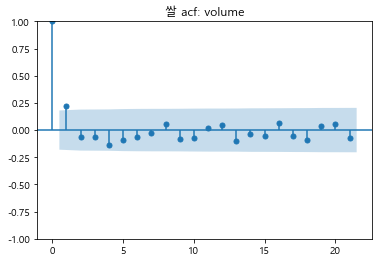

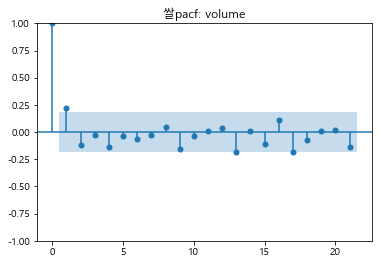

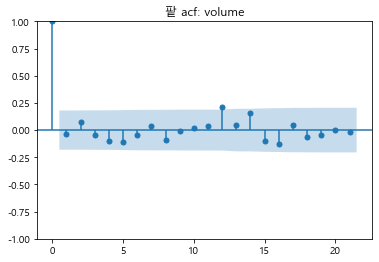

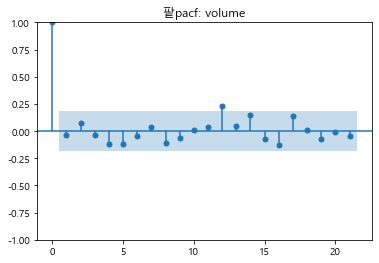

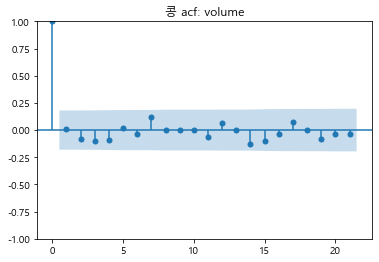

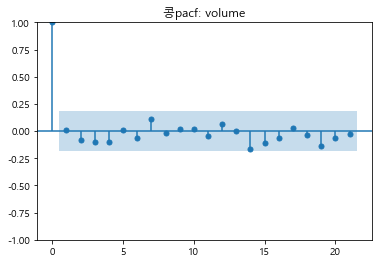

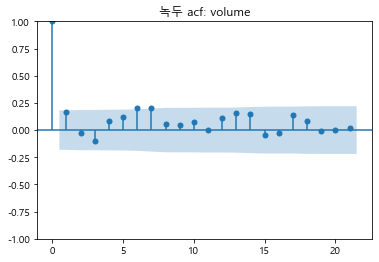

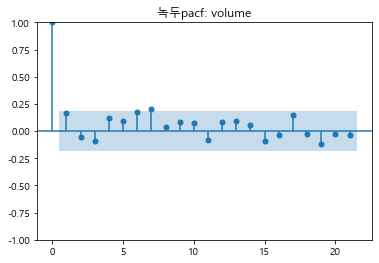

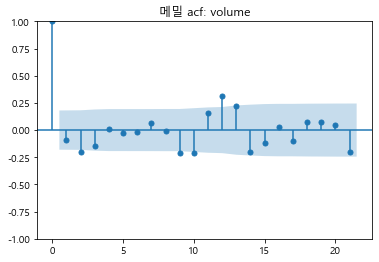

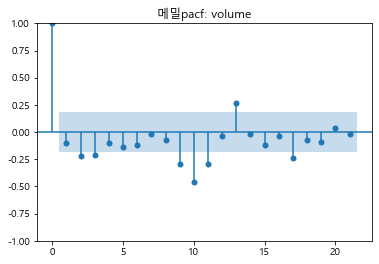

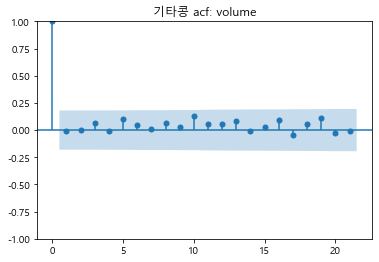

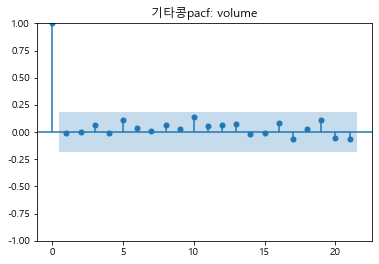

In [9]:
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")
matplotlib.rcParams['font.family'] ='Malgun Gothic'    
matplotlib.rcParams['axes.unicode_minus'] =False

for column in volume_.columns : 
    plot_acf(volume_[column])
    plt.title(column+str(" acf: volume"))
    plt.show()
    plot_pacf(volume_[column])
    plt.title(column+str("pacf: volume"))
    plt.show()
    
# 쌀 : 1 시차 전
# 팥 : x
# 콩 : x
# 녹두 : x
# 메밀 : 9 ~ 12 시차 전
# 기타콩 : x

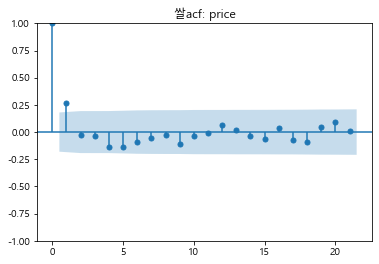

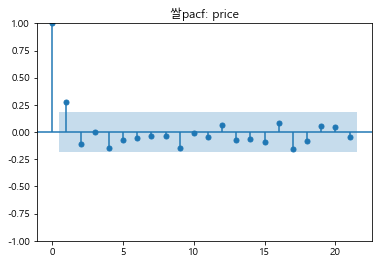

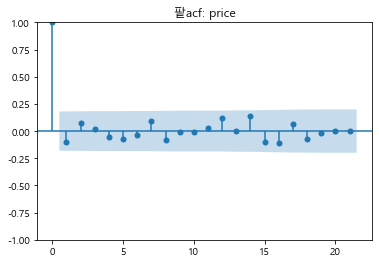

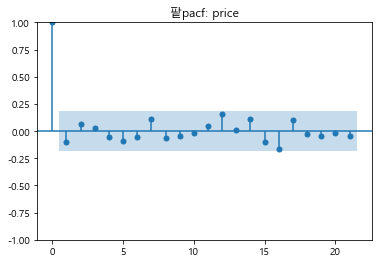

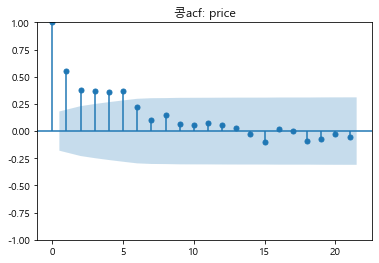

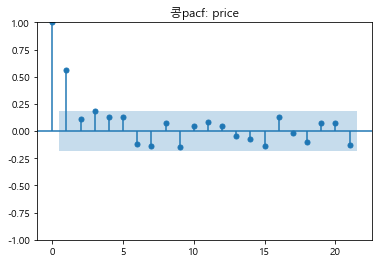

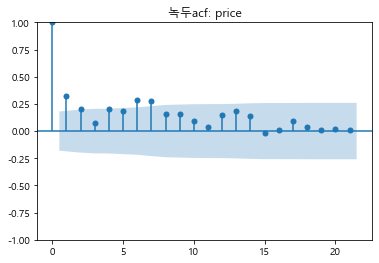

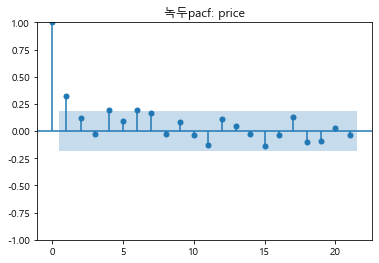

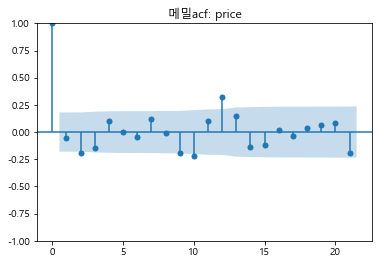

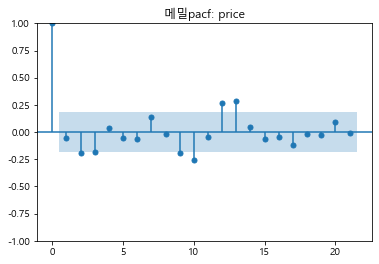

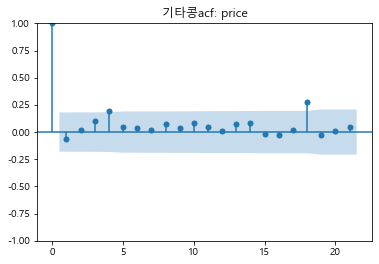

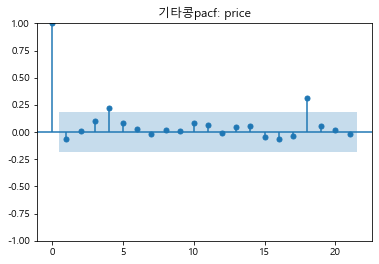

In [10]:
for column in price_.columns : 
    plot_acf(price_[column])
    plt.title(column+str("acf: price"))
    plt.show()
    plot_pacf(price_[column])
    plt.title(column+str("pacf: price"))
    plt.show()
    
# 쌀 : 1 시차 전
# 팥 : x
# 콩 : 5 시차 전
# 녹두 : 1 
# 메밀 : 12 시차 전
# 기타콩 : x

# 시계열 예측을 위한 MLP 수행

### 수입량, 수입가격 데이터 결합

In [22]:
price_0 = price_.copy() 

for column in price_.columns : 
    print(column)
    price_0.rename(columns = {column : column + str("_price")}, inplace = True)
    

#  price_0 = price_.rename(columns = {"쌀" : "쌀_0",
#                         "팥" : "팥_0",
#                         "녹두" : "녹두_0",
#                         "콩" : "콩_0",
#                         "메밀" : "메밀_0",
#                         "기타콩" : "기타콩_0"})

쌀
팥
콩
녹두
메밀
기타콩


In [23]:
price_0

,쌀_price,팥_price,콩_price,녹두_price,메밀_price,기타콩_price
날짜,,,,,,
2012-01-01,14390615.0,694428,298470,58548,70110,408319
2012-02-01,6279896.0,640202,289048,0,0,190148
2012-03-01,18238124.0,3674904,362021,0,37680,321311
2012-04-01,19195746.0,2910072,539112,977476,350293,271190
2012-05-01,30108629.0,6158674,664481,23296,216664,356704
...,...,...,...,...,...,...
2021-06-01,17143062.0,5607051,858195,1902586,588,191786
2021-07-01,40929379.0,5278794,705406,3663230,167613,705406
2021-08-01,32120968.0,2279217,978675,1699447,220396,178666


In [195]:
crop = pd.concat([volume_, price_0] , axis = 1)

# 클래스 만들기

### 쌀_수입량_수입가격

In [228]:
# 쌀 = crop_MLP_forecast
# 쌀.n 
# 쌀.x1
# crop_MLP_forecast.plot_volume 
# crop_MLP_forecast.plot_price



class crop_MLP_forecast : 
    def __init__(self, n = 118, t = 18, column_1 = None , column_2 = None) : 
        self.n = n 
        self.t = t
        self.column_1 = column_1
        self.column_2 = column_2
        
        self.x1 = list(crop[self.column_1].values[:n-2])
        self.x2 = list(crop[self.column_1].values[1:n-1])
        self.x3 = list(crop[self.column_2].values[:n-2])
        self.x4 = list(crop[self.column_2].values[1:n-1])
        self.y_volume = list(crop[self.column_1].values[2:n]) 
        self.y_price = list(crop[self.column_2].values[2:n]) 

        # 116개
#         print(len(self.x1))
#         print(len(self.x2))
#         print(len(self.x3))
#         print(len(self.x4))
#         print(len(self.y_volume))
#         print(len(self.y_price))


        # 데이터 프레임 변환
        self.crop_df = pd.DataFrame({"x1" : self.x1, 
                                     "x2" : self.x2, 
                                     "x3" : self.x3, 
                                     "x4" : self.x4, 
                                     "y_volume" : self.y_volume, 
                                     "y_price" : self.y_price})
        self.X_crop = self.crop_df.drop(["y_volume", "y_price"], axis = 1)
        self.y_crop_volume = self.crop_df["y_volume"]
        self.y_crop_price = self.crop_df["y_price"]


        # train, test 분할
        self.x_test = self.X_crop.iloc[::-1][:t]
        self.y_test_volume = self.y_crop_volume.iloc[::-1][:t] # 수입량
        self.y_test_price = self.y_crop_price.iloc[::-1][:t]   # 수입가격

        self.x_train = self.X_crop.iloc[:self.x_test.index[0]]
        self.y_train_volume = self.y_crop_volume.iloc[:self.y_test_volume.index[0]]
        self.y_train_price = self.y_crop_price.iloc[:self.y_test_price.index[0]]

        # reset index
        self.x_test.reset_index(drop = True, inplace = True)
        self.y_test_volume.reset_index(drop = True, inplace = True)
        self.y_test_price.reset_index(drop = True, inplace = True)

# model, model1 = rice.modeling()
    def modeling(self) : 
        # 수입량 모델
        model = Sequential()
        model.add(Dense(32, input_shape = (4,), activation = "relu"))
        model.add(Dense(32, activation = "relu"))
        model.add(Dense(1))
        print(model.summary())

        model.compile(optimizer = Adam(lr = 0.003) , loss = "mean_squared_error")

        model.fit(self.x_train, self.y_train_volume, epochs = 1000)

        # 수입가격 모델
        model1 = Sequential()

        model1.add(Dense(32, input_shape = (4,), activation = "relu"))
        model1.add(Dense(32, activation = "relu"))
        model1.add(Dense(1))

        print(model1.summary())

        model1.compile(optimizer = Adam(lr = 0.003) , loss = "mean_squared_error")

        model1.fit(self.x_train, self.y_train_price, epochs = 1000)
        
        return model, model1

# rice.model_evaluate(model, model1)
    def model_evaluate(self, model, model1) :
        train_score_volume = model.evaluate(self.x_train, self.y_train_volume)
        test_score_volume = model1.evaluate(self.x_test, self.y_test_volume)
        train_score_price = model.evaluate(self.x_train, self.y_train_price)
        test_score_price = model1.evaluate(self.x_test, self.y_test_price)
        
        print(self.column_1 , "수입량 train_score :", train_score_volume)
        print(self.column_1 ,"수입량 test_score :", test_score_volume)
        print(self.column_1 ,"수입가격 train_score :", train_score_price)
        print(self.column_1 ,"수입가격 test_score :", test_score_price)
        
# rice.plot_volume(model) 
    def plot_volume(self, model) :
        model_pred = model.predict(self.x_test)
        plt.plot(model_pred, "b")
        plt.plot(self.y_test_volume, "y")
        plt.show()
        
# rice.plot_price(model1) 
    def plot_price(self, model1) :
        model1_pred = model1.predict(self.x_test)
        plt.plot(model1_pred, "b")
        plt.plot(self.y_test_price, "y")
        plt.show()
        


In [229]:
# 객체 할당
rice = crop_MLP_forecast(column_1 = "쌀", column_2 = "쌀_0")

In [230]:
model, model1 = rice.modeling()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 32)                160       
_________________________________________________________________
dense_120 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
4/4 [==============================] - 0s 0s/step - loss: 1143534774124544.0000
Epoch 2/1000
4/4 [==============================] - 0s 997us/step - loss: 933167544401920.0000
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 848823580622848.0000
Epoch 4/1000
4/4 [==============================] - 0s 994us/step - loss: 782588138487808.0000


4/4 [==============================] - 0s 997us/step - loss: 598578451972096.0000
Epoch 165/1000
4/4 [==============================] - 0s 998us/step - loss: 616552755888128.0000
Epoch 166/1000
4/4 [==============================] - 0s 748us/step - loss: 587155516686336.0000
Epoch 167/1000
4/4 [==============================] - 0s 998us/step - loss: 618753658191872.0000
Epoch 168/1000
4/4 [==============================] - 0s 1ms/step - loss: 602830134050816.0000
Epoch 169/1000
4/4 [==============================] - 0s 1ms/step - loss: 607784714371072.0000
Epoch 170/1000
4/4 [==============================] - 0s 748us/step - loss: 599291483652096.0000
Epoch 171/1000
4/4 [==============================] - 0s 997us/step - loss: 593951698452480.0000
Epoch 172/1000
4/4 [==============================] - 0s 997us/step - loss: 591635771555840.0000
Epoch 173/1000
4/4 [==============================] - 0s 748us/step - loss: 587684737187840.0000
Epoch 174/1000
4/4 [=============================

4/4 [==============================] - 0s 748us/step - loss: 548766327242752.0000
Epoch 333/1000
4/4 [==============================] - 0s 995us/step - loss: 592870641762304.0000
Epoch 334/1000
4/4 [==============================] - 0s 997us/step - loss: 584726242918400.0000
Epoch 335/1000
4/4 [==============================] - 0s 998us/step - loss: 565371979431936.0000
Epoch 336/1000
4/4 [==============================] - 0s 746us/step - loss: 555501674823680.0000
Epoch 337/1000
4/4 [==============================] - 0s 997us/step - loss: 533254247546880.0000
Epoch 338/1000
4/4 [==============================] - 0s 998us/step - loss: 539618281783296.0000
Epoch 339/1000
4/4 [==============================] - 0s 997us/step - loss: 537303160193024.0000
Epoch 340/1000
4/4 [==============================] - 0s 748us/step - loss: 533978855505920.0000
Epoch 341/1000
4/4 [==============================] - 0s 748us/step - loss: 530792593752064.0000
Epoch 342/1000
4/4 [=========================

4/4 [==============================] - 0s 748us/step - loss: 493100229197824.0000
Epoch 501/1000
4/4 [==============================] - 0s 1ms/step - loss: 487421745561600.0000
Epoch 502/1000
4/4 [==============================] - 0s 1ms/step - loss: 486658516451328.0000
Epoch 503/1000
4/4 [==============================] - 0s 1ms/step - loss: 484447648481280.0000
Epoch 504/1000
4/4 [==============================] - 0s 997us/step - loss: 486509299892224.0000
Epoch 505/1000
4/4 [==============================] - 0s 1ms/step - loss: 487892816232448.0000
Epoch 506/1000
4/4 [==============================] - 0s 997us/step - loss: 496437150351360.0000
Epoch 507/1000
4/4 [==============================] - 0s 1ms/step - loss: 487314237161472.0000
Epoch 508/1000
4/4 [==============================] - 0s 750us/step - loss: 486906215268352.0000
Epoch 509/1000
4/4 [==============================] - 0s 1ms/step - loss: 483912925052928.0000
Epoch 510/1000
4/4 [==============================] - 0s 

Epoch 585/1000
4/4 [==============================] - 0s 748us/step - loss: 475980288229376.0000
Epoch 586/1000
4/4 [==============================] - 0s 748us/step - loss: 476426562174976.0000
Epoch 587/1000
4/4 [==============================] - 0s 746us/step - loss: 465623914119168.0000
Epoch 588/1000
4/4 [==============================] - 0s 998us/step - loss: 463306242392064.0000
Epoch 589/1000
4/4 [==============================] - 0s 998us/step - loss: 469374460755968.0000
Epoch 590/1000
4/4 [==============================] - 0s 997us/step - loss: 463613533880320.0000
Epoch 591/1000
4/4 [==============================] - 0s 998us/step - loss: 468212906983424.0000
Epoch 592/1000
4/4 [==============================] - 0s 748us/step - loss: 469851638333440.0000
Epoch 593/1000
4/4 [==============================] - 0s 748us/step - loss: 459147539644416.0000
Epoch 594/1000
4/4 [==============================] - 0s 750us/step - loss: 466542533804032.0000
Epoch 595/1000
4/4 [==========

4/4 [==============================] - 0s 1ms/step - loss: 434972880011264.0000
Epoch 755/1000
4/4 [==============================] - 0s 1ms/step - loss: 444171257118720.0000
Epoch 756/1000
4/4 [==============================] - 0s 2ms/step - loss: 464052526514176.0000
Epoch 757/1000
4/4 [==============================] - 0s 997us/step - loss: 456203138236416.0000
Epoch 758/1000
4/4 [==============================] - 0s 1ms/step - loss: 430682274791424.0000
Epoch 759/1000
4/4 [==============================] - 0s 748us/step - loss: 454389990948864.0000
Epoch 760/1000
4/4 [==============================] - 0s 1ms/step - loss: 459320714067968.0000
Epoch 761/1000
4/4 [==============================] - 0s 997us/step - loss: 436704456474624.0000
Epoch 762/1000
4/4 [==============================] - 0s 997us/step - loss: 436300427558912.0000
Epoch 763/1000
4/4 [==============================] - 0s 996us/step - loss: 442539203100672.0000
Epoch 764/1000
4/4 [==============================] - 0

4/4 [==============================] - 0s 997us/step - loss: 403490937503744.0000
Epoch 925/1000
4/4 [==============================] - 0s 748us/step - loss: 413166827732992.0000
Epoch 926/1000
4/4 [==============================] - 0s 997us/step - loss: 416574112530432.0000
Epoch 927/1000
4/4 [==============================] - 0s 1ms/step - loss: 413486131707904.0000
Epoch 928/1000
4/4 [==============================] - 0s 997us/step - loss: 410912305446912.0000
Epoch 929/1000
4/4 [==============================] - 0s 1ms/step - loss: 413135454339072.0000
Epoch 930/1000
4/4 [==============================] - 0s 997us/step - loss: 408138763206656.0000
Epoch 931/1000
4/4 [==============================] - 0s 998us/step - loss: 406015371640832.0000
Epoch 932/1000
4/4 [==============================] - 0s 1ms/step - loss: 408812771082240.0000
Epoch 933/1000
4/4 [==============================] - 0s 1ms/step - loss: 413042642780160.0000
Epoch 934/1000
4/4 [==============================] -

4/4 [==============================] - 0s 1ms/step - loss: 403482314014720.0000
Epoch 88/1000
4/4 [==============================] - 0s 1ms/step - loss: 402235062222848.0000
Epoch 89/1000
4/4 [==============================] - 0s 2ms/step - loss: 401733020811264.0000
Epoch 90/1000
4/4 [==============================] - 0s 1ms/step - loss: 401137496752128.0000
Epoch 91/1000
4/4 [==============================] - 0s 1ms/step - loss: 400848760864768.0000
Epoch 92/1000
4/4 [==============================] - 0s 1ms/step - loss: 400292059283456.0000
Epoch 93/1000
4/4 [==============================] - 0s 2ms/step - loss: 400019899285504.0000
Epoch 94/1000
4/4 [==============================] - 0s 2ms/step - loss: 400188006989824.0000
Epoch 95/1000
4/4 [==============================] - 0s 1ms/step - loss: 401378618900480.0000
Epoch 96/1000
4/4 [==============================] - 0s 1ms/step - loss: 399069134454784.0000
Epoch 97/1000
4/4 [==============================] - 0s 1ms/step - loss: 3

4/4 [==============================] - 0s 997us/step - loss: 354466167521280.0000
Epoch 259/1000
4/4 [==============================] - 0s 1ms/step - loss: 353084228239360.0000
Epoch 260/1000
4/4 [==============================] - 0s 1ms/step - loss: 353525972336640.0000
Epoch 261/1000
4/4 [==============================] - 0s 1ms/step - loss: 353539125673984.0000
Epoch 262/1000
4/4 [==============================] - 0s 998us/step - loss: 354462140989440.0000
Epoch 263/1000
4/4 [==============================] - 0s 997us/step - loss: 353675591548928.0000
Epoch 264/1000
4/4 [==============================] - 0s 994us/step - loss: 351426236645376.0000
Epoch 265/1000
4/4 [==============================] - 0s 1ms/step - loss: 354798457061376.0000
Epoch 266/1000
4/4 [==============================] - 0s 1ms/step - loss: 354589446504448.0000
Epoch 267/1000
4/4 [==============================] - 0s 997us/step - loss: 355229195304960.0000
Epoch 268/1000
4/4 [==============================] - 0

4/4 [==============================] - 0s 998us/step - loss: 335050767859712.0000
Epoch 429/1000
4/4 [==============================] - 0s 1000us/step - loss: 336253459365888.0000
Epoch 430/1000
4/4 [==============================] - 0s 748us/step - loss: 325721662685184.0000
Epoch 431/1000
4/4 [==============================] - 0s 998us/step - loss: 333706711531520.0000
Epoch 432/1000
4/4 [==============================] - 0s 998us/step - loss: 327822103019520.0000
Epoch 433/1000
4/4 [==============================] - 0s 1ms/step - loss: 329806042365952.0000
Epoch 434/1000
4/4 [==============================] - 0s 997us/step - loss: 324625204510720.0000
Epoch 435/1000
4/4 [==============================] - 0s 998us/step - loss: 323911501742080.0000
Epoch 436/1000
4/4 [==============================] - 0s 748us/step - loss: 322036748517376.0000
Epoch 437/1000
4/4 [==============================] - 0s 997us/step - loss: 321311402360832.0000
Epoch 438/1000
4/4 [==========================

Epoch 513/1000
4/4 [==============================] - 0s 997us/step - loss: 312703516147712.0000
Epoch 514/1000
4/4 [==============================] - 0s 1ms/step - loss: 311149174194176.0000
Epoch 515/1000
4/4 [==============================] - 0s 748us/step - loss: 312126849679360.0000
Epoch 516/1000
4/4 [==============================] - 0s 1ms/step - loss: 311207793786880.0000
Epoch 517/1000
4/4 [==============================] - 0s 1ms/step - loss: 312889474809856.0000
Epoch 518/1000
4/4 [==============================] - 0s 997us/step - loss: 316118283583488.0000
Epoch 519/1000
4/4 [==============================] - 0s 1ms/step - loss: 309822566170624.0000
Epoch 520/1000
4/4 [==============================] - 0s 1ms/step - loss: 319190326050816.0000
Epoch 521/1000
4/4 [==============================] - 0s 998us/step - loss: 310625255292928.0000
Epoch 522/1000
4/4 [==============================] - 0s 997us/step - loss: 320319936004096.0000
Epoch 523/1000
4/4 [====================

Epoch 598/1000
4/4 [==============================] - 0s 997us/step - loss: 303410146443264.0000
Epoch 599/1000
4/4 [==============================] - 0s 748us/step - loss: 304144048979968.0000
Epoch 600/1000
4/4 [==============================] - 0s 997us/step - loss: 305599170478080.0000
Epoch 601/1000
4/4 [==============================] - 0s 997us/step - loss: 303144462450688.0000
Epoch 602/1000
4/4 [==============================] - 0s 998us/step - loss: 302498170535936.0000
Epoch 603/1000
4/4 [==============================] - 0s 1ms/step - loss: 307517477355520.0000
Epoch 604/1000
4/4 [==============================] - 0s 998us/step - loss: 303559832764416.0000
Epoch 605/1000
4/4 [==============================] - 0s 748us/step - loss: 304549386518528.0000
Epoch 606/1000
4/4 [==============================] - 0s 995us/step - loss: 301902713585664.0000
Epoch 607/1000
4/4 [==============================] - 0s 998us/step - loss: 302190946156544.0000
Epoch 608/1000
4/4 [============

4/4 [==============================] - 0s 1ms/step - loss: 284211877511168.0000
Epoch 768/1000
4/4 [==============================] - 0s 997us/step - loss: 287865250512896.0000
Epoch 769/1000
4/4 [==============================] - 0s 1ms/step - loss: 288430877573120.0000
Epoch 770/1000
4/4 [==============================] - 0s 748us/step - loss: 288365043777536.0000
Epoch 771/1000
4/4 [==============================] - 0s 1ms/step - loss: 281128963407872.0000
Epoch 772/1000
4/4 [==============================] - 0s 1ms/step - loss: 284893972004864.0000
Epoch 773/1000
4/4 [==============================] - 0s 997us/step - loss: 292742118768640.0000
Epoch 774/1000
4/4 [==============================] - 0s 998us/step - loss: 290575341322240.0000
Epoch 775/1000
4/4 [==============================] - 0s 998us/step - loss: 295235783491584.0000
Epoch 776/1000
4/4 [==============================] - 0s 997us/step - loss: 292328392622080.0000
Epoch 777/1000
4/4 [==============================] -

4/4 [==============================] - 0s 748us/step - loss: 259888202645504.0000
Epoch 938/1000
4/4 [==============================] - 0s 998us/step - loss: 271561923756032.0000
Epoch 939/1000
4/4 [==============================] - 0s 1ms/step - loss: 257699228942336.0000
Epoch 940/1000
4/4 [==============================] - 0s 997us/step - loss: 276087208673280.0000
Epoch 941/1000
4/4 [==============================] - 0s 1ms/step - loss: 264284772761600.0000
Epoch 942/1000
4/4 [==============================] - 0s 998us/step - loss: 264581427494912.0000
Epoch 943/1000
4/4 [==============================] - 0s 748us/step - loss: 262723636035584.0000
Epoch 944/1000
4/4 [==============================] - 0s 997us/step - loss: 259834029015040.0000
Epoch 945/1000
4/4 [==============================] - 0s 997us/step - loss: 260902418907136.0000
Epoch 946/1000
4/4 [==============================] - 0s 997us/step - loss: 261827934027776.0000
Epoch 947/1000
4/4 [=============================

In [231]:
rice.model_evaluate(model, model1)

1/1 [==============================] - 0s 1ms/step - loss: 372857855016960.0000
쌀 수입량 train_score : 390372194779136.0
쌀 수입량 test_score : 594983966998528.0
쌀 수입가격 train_score : 315255196483584.0
쌀 수입가격 test_score : 372857855016960.0


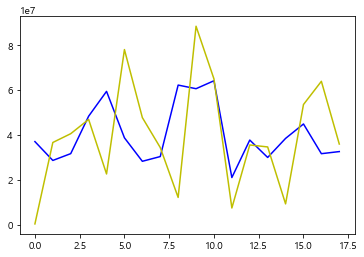

In [232]:
rice.plot_volume(model)

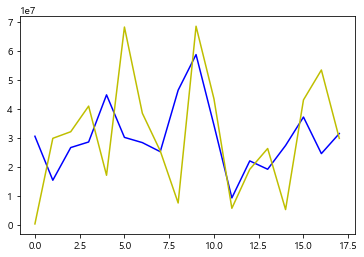

In [233]:
rice.plot_price(model1)

# 팥_수입량_수입가격

In [234]:
red_bean = crop_MLP_forecast(column_1 = "팥", column_2 = "팥_0")
model, model1 = red_bean.modeling()
red_bean.model_evaluate(model, model1)

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 32)                160       
_________________________________________________________________
dense_126 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
4/4 [==============================] - 0s 854us/step - loss: 12712173109248.0000
Epoch 2/1000
4/4 [==============================] - 0s 998us/step - loss: 7710453006336.0000
Epoch 3/1000
4/4 [==============================] - 0s 748us/step - loss: 5359231041536.0000
Epoch 4/1000
4/4 [==============================] - 0s 998us/step - loss: 5417550217216.0000
Epo

4/4 [==============================] - 0s 994us/step - loss: 4723758858240.0000
Epoch 82/1000
4/4 [==============================] - 0s 997us/step - loss: 4764753985536.0000
Epoch 83/1000
4/4 [==============================] - 0s 995us/step - loss: 4748059607040.0000
Epoch 84/1000
4/4 [==============================] - 0s 748us/step - loss: 4768692961280.0000
Epoch 85/1000
4/4 [==============================] - 0s 748us/step - loss: 4758056730624.0000
Epoch 86/1000
4/4 [==============================] - 0s 748us/step - loss: 4722403573760.0000
Epoch 87/1000
4/4 [==============================] - 0s 998us/step - loss: 4726813884416.0000
Epoch 88/1000
4/4 [==============================] - 0s 997us/step - loss: 4712615641088.0000
Epoch 89/1000
4/4 [==============================] - 0s 748us/step - loss: 4714975985664.0000
Epoch 90/1000
4/4 [==============================] - 0s 999us/step - loss: 4718741422080.0000
Epoch 91/1000
4/4 [==============================] - 0s 748us/step - loss:

4/4 [==============================] - 0s 998us/step - loss: 4553114648576.0000
Epoch 254/1000
4/4 [==============================] - 0s 997us/step - loss: 4506792230912.0000
Epoch 255/1000
4/4 [==============================] - 0s 998us/step - loss: 4583781826560.0000
Epoch 256/1000
4/4 [==============================] - 0s 997us/step - loss: 4522315874304.0000
Epoch 257/1000
4/4 [==============================] - 0s 998us/step - loss: 4563024216064.0000
Epoch 258/1000
4/4 [==============================] - 0s 997us/step - loss: 4566150021120.0000
Epoch 259/1000
4/4 [==============================] - 0s 748us/step - loss: 4526095990784.0000
Epoch 260/1000
4/4 [==============================] - 0s 997us/step - loss: 4581612847104.0000
Epoch 261/1000
4/4 [==============================] - 0s 750us/step - loss: 4556827656192.0000
Epoch 262/1000
4/4 [==============================] - 0s 748us/step - loss: 4540471967744.0000
Epoch 263/1000
4/4 [==============================] - 0s 997us/st

4/4 [==============================] - 0s 997us/step - loss: 4397560496128.0000
Epoch 426/1000
4/4 [==============================] - 0s 998us/step - loss: 4406933716992.0000
Epoch 427/1000
4/4 [==============================] - 0s 1ms/step - loss: 4390270009344.0000
Epoch 428/1000
4/4 [==============================] - 0s 997us/step - loss: 4408985780224.0000
Epoch 429/1000
4/4 [==============================] - 0s 748us/step - loss: 4403800047616.0000
Epoch 430/1000
4/4 [==============================] - 0s 997us/step - loss: 4406771187712.0000
Epoch 431/1000
4/4 [==============================] - 0s 996us/step - loss: 4452390535168.0000
Epoch 432/1000
4/4 [==============================] - 0s 998us/step - loss: 4519672414208.0000
Epoch 433/1000
4/4 [==============================] - 0s 998us/step - loss: 4389352243200.0000
Epoch 434/1000
4/4 [==============================] - 0s 748us/step - loss: 4444940926976.0000
Epoch 435/1000
4/4 [==============================] - 0s 998us/step

4/4 [==============================] - 0s 997us/step - loss: 4330598957056.0000
Epoch 598/1000
4/4 [==============================] - 0s 1ms/step - loss: 4302449410048.0000
Epoch 599/1000
4/4 [==============================] - 0s 997us/step - loss: 4311661150208.0000
Epoch 600/1000
4/4 [==============================] - 0s 1ms/step - loss: 4328884011008.0000
Epoch 601/1000
4/4 [==============================] - 0s 1ms/step - loss: 4323695394816.0000
Epoch 602/1000
4/4 [==============================] - 0s 997us/step - loss: 4336193634304.0000
Epoch 603/1000
4/4 [==============================] - 0s 997us/step - loss: 4274917474304.0000
Epoch 604/1000
4/4 [==============================] - 0s 1ms/step - loss: 4291630465024.0000
Epoch 605/1000
4/4 [==============================] - 0s 998us/step - loss: 4291320610816.0000
Epoch 606/1000
4/4 [==============================] - 0s 997us/step - loss: 4283681996800.0000
Epoch 607/1000
4/4 [==============================] - 0s 1ms/step - loss:

4/4 [==============================] - 0s 498us/step - loss: 4294620741632.0000
Epoch 770/1000
4/4 [==============================] - 0s 257us/step - loss: 4245799829504.0000
Epoch 771/1000
4/4 [==============================] - 0s 0s/step - loss: 4214511370240.0000
Epoch 772/1000
4/4 [==============================] - 0s 0s/step - loss: 4146444107776.0000
Epoch 773/1000
4/4 [==============================] - 0s 4ms/step - loss: 4175218868224.0000
Epoch 774/1000
4/4 [==============================] - 0s 0s/step - loss: 4181620948992.0000
Epoch 775/1000
4/4 [==============================] - 0s 0s/step - loss: 4217193365504.0000
Epoch 776/1000
4/4 [==============================] - 0s 0s/step - loss: 4192339755008.0000
Epoch 777/1000
4/4 [==============================] - 0s 0s/step - loss: 4179176194048.0000
Epoch 778/1000
4/4 [==============================] - 0s 2ms/step - loss: 4193771847680.0000
Epoch 779/1000
4/4 [==============================] - 0s 767us/step - loss: 42530821898

Epoch 856/1000
4/4 [==============================] - 0s 997us/step - loss: 4098561146880.0000
Epoch 857/1000
4/4 [==============================] - 0s 998us/step - loss: 4068755636224.0000
Epoch 858/1000
4/4 [==============================] - 0s 997us/step - loss: 4101163712512.0000
Epoch 859/1000
4/4 [==============================] - 0s 748us/step - loss: 4057893175296.0000
Epoch 860/1000
4/4 [==============================] - 0s 997us/step - loss: 4055459954688.0000
Epoch 861/1000
4/4 [==============================] - 0s 998us/step - loss: 4096969670656.0000
Epoch 862/1000
4/4 [==============================] - 0s 1ms/step - loss: 4027778072576.0000
Epoch 863/1000
4/4 [==============================] - 0s 748us/step - loss: 4108338069504.0000
Epoch 864/1000
4/4 [==============================] - 0s 997us/step - loss: 4086098296832.0000
Epoch 865/1000
4/4 [==============================] - 0s 997us/step - loss: 4040260583424.0000
Epoch 866/1000
4/4 [==============================] 

4/4 [==============================] - 0s 748us/step - loss: 8298062413824.0000
Epoch 21/1000
4/4 [==============================] - 0s 997us/step - loss: 8330268377088.0000
Epoch 22/1000
4/4 [==============================] - 0s 997us/step - loss: 8300870500352.0000
Epoch 23/1000
4/4 [==============================] - 0s 748us/step - loss: 8256219512832.0000
Epoch 24/1000
4/4 [==============================] - 0s 748us/step - loss: 8296115732480.0000
Epoch 25/1000
4/4 [==============================] - 0s 1ms/step - loss: 8249745604608.0000
Epoch 26/1000
4/4 [==============================] - 0s 998us/step - loss: 8221804724224.0000
Epoch 27/1000
4/4 [==============================] - 0s 1ms/step - loss: 8229292605440.0000
Epoch 28/1000
4/4 [==============================] - 0s 997us/step - loss: 8244168753152.0000
Epoch 29/1000
4/4 [==============================] - 0s 748us/step - loss: 8209195597824.0000
Epoch 30/1000
4/4 [==============================] - 0s 997us/step - loss: 822

4/4 [==============================] - 0s 1ms/step - loss: 7725154566144.0000
Epoch 195/1000
4/4 [==============================] - 0s 1ms/step - loss: 7774429773824.0000
Epoch 196/1000
4/4 [==============================] - 0s 1ms/step - loss: 7742658969600.0000
Epoch 197/1000
4/4 [==============================] - 0s 1ms/step - loss: 7747265888256.0000
Epoch 198/1000
4/4 [==============================] - 0s 997us/step - loss: 7734729113600.0000
Epoch 199/1000
4/4 [==============================] - 0s 1ms/step - loss: 7739698315264.0000
Epoch 200/1000
4/4 [==============================] - 0s 1ms/step - loss: 7815316897792.0000
Epoch 201/1000
4/4 [==============================] - 0s 1ms/step - loss: 7712324714496.0000
Epoch 202/1000
4/4 [==============================] - 0s 1ms/step - loss: 7745862893568.0000
Epoch 203/1000
4/4 [==============================] - 0s 1ms/step - loss: 7759812100096.0000
Epoch 204/1000
4/4 [==============================] - 0s 998us/step - loss: 7733305

4/4 [==============================] - 0s 1ms/step - loss: 7413084192768.0000
Epoch 369/1000
4/4 [==============================] - 0s 1ms/step - loss: 7406986723328.0000
Epoch 370/1000
4/4 [==============================] - 0s 1ms/step - loss: 7450487947264.0000
Epoch 371/1000
4/4 [==============================] - 0s 1ms/step - loss: 7465965977600.0000
Epoch 372/1000
4/4 [==============================] - 0s 997us/step - loss: 7388870475776.0000
Epoch 373/1000
4/4 [==============================] - 0s 1ms/step - loss: 7553708720128.0000
Epoch 374/1000
4/4 [==============================] - 0s 2ms/step - loss: 7372776407040.0000
Epoch 375/1000
4/4 [==============================] - 0s 998us/step - loss: 7404868599808.0000
Epoch 376/1000
4/4 [==============================] - 0s 997us/step - loss: 7407253061632.0000
Epoch 377/1000
4/4 [==============================] - 0s 998us/step - loss: 7375480684544.0000
Epoch 378/1000
4/4 [==============================] - 0s 748us/step - loss: 7

4/4 [==============================] - 0s 998us/step - loss: 7052756254720.0000
Epoch 542/1000
4/4 [==============================] - 0s 1ms/step - loss: 6993505943552.0000
Epoch 543/1000
4/4 [==============================] - 0s 1ms/step - loss: 7041950154752.0000
Epoch 544/1000
4/4 [==============================] - 0s 998us/step - loss: 7010542157824.0000
Epoch 545/1000
4/4 [==============================] - 0s 997us/step - loss: 7087668068352.0000
Epoch 546/1000
4/4 [==============================] - 0s 998us/step - loss: 6975275925504.0000
Epoch 547/1000
4/4 [==============================] - 0s 997us/step - loss: 7219694796800.0000
Epoch 548/1000
4/4 [==============================] - 0s 748us/step - loss: 7142273712128.0000
Epoch 549/1000
4/4 [==============================] - 0s 997us/step - loss: 7003942420480.0000
Epoch 550/1000
4/4 [==============================] - 0s 1ms/step - loss: 6994011357184.0000
Epoch 551/1000
4/4 [==============================] - 0s 750us/step - l

4/4 [==============================] - 0s 997us/step - loss: 6714976894976.0000
Epoch 714/1000
4/4 [==============================] - 0s 748us/step - loss: 6540343377920.0000
Epoch 715/1000
4/4 [==============================] - 0s 1ms/step - loss: 6640350789632.0000
Epoch 716/1000
4/4 [==============================] - 0s 997us/step - loss: 6613677637632.0000
Epoch 717/1000
4/4 [==============================] - 0s 997us/step - loss: 6601185427456.0000
Epoch 718/1000
4/4 [==============================] - 0s 1ms/step - loss: 6486798893056.0000
Epoch 719/1000
4/4 [==============================] - 0s 748us/step - loss: 6538817175552.0000
Epoch 720/1000
4/4 [==============================] - 0s 998us/step - loss: 6558427643904.0000
Epoch 721/1000
4/4 [==============================] - 0s 998us/step - loss: 6518779936768.0000
Epoch 722/1000
4/4 [==============================] - 0s 997us/step - loss: 6543636955136.0000
Epoch 723/1000
4/4 [==============================] - 0s 748us/step -

4/4 [==============================] - 0s 748us/step - loss: 6230224928768.0000
Epoch 887/1000
4/4 [==============================] - 0s 1ms/step - loss: 6202108936192.0000
Epoch 888/1000
4/4 [==============================] - 0s 997us/step - loss: 6316518014976.0000
Epoch 889/1000
4/4 [==============================] - 0s 1ms/step - loss: 6230313009152.0000
Epoch 890/1000
4/4 [==============================] - 0s 748us/step - loss: 6208112558080.0000
Epoch 891/1000
4/4 [==============================] - 0s 997us/step - loss: 6337762689024.0000
Epoch 892/1000
4/4 [==============================] - 0s 997us/step - loss: 6153644277760.0000
Epoch 893/1000
4/4 [==============================] - 0s 997us/step - loss: 6311935737856.0000
Epoch 894/1000
4/4 [==============================] - 0s 997us/step - loss: 6158142668800.0000
Epoch 895/1000
4/4 [==============================] - 0s 751us/step - loss: 6211555557376.0000
Epoch 896/1000
4/4 [==============================] - 0s 997us/step -

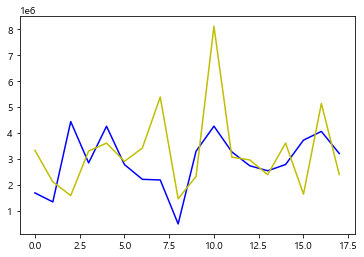

In [235]:
red_bean.plot_volume(model)

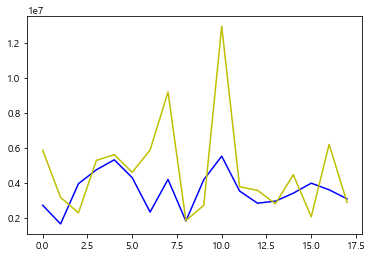

In [236]:
red_bean.plot_price(model1)

# 콩_수입량_수입가격

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 32)                160       
_________________________________________________________________
dense_132 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 2459586527232.0000
Epoch 2/1000
4/4 [==============================] - 0s 747us/step - loss: 1360219602944.0000
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 837250777088.0000
Epoch 4/1000
4/4 [==============================] - 0s 995us/step - loss: 750403452928.0000
Epoch 5/10

Epoch 82/1000
4/4 [==============================] - 0s 748us/step - loss: 517998772224.0000
Epoch 83/1000
4/4 [==============================] - 0s 1ms/step - loss: 519296974848.0000
Epoch 84/1000
4/4 [==============================] - 0s 998us/step - loss: 518745620480.0000
Epoch 85/1000
4/4 [==============================] - 0s 1ms/step - loss: 519032504320.0000
Epoch 86/1000
4/4 [==============================] - 0s 748us/step - loss: 515799515136.0000
Epoch 87/1000
4/4 [==============================] - 0s 2ms/step - loss: 513177911296.0000
Epoch 88/1000
4/4 [==============================] - 0s 997us/step - loss: 512452984832.0000
Epoch 89/1000
4/4 [==============================] - 0s 2ms/step - loss: 513563492352.0000
Epoch 90/1000
4/4 [==============================] - 0s 998us/step - loss: 512472580096.0000
Epoch 91/1000
4/4 [==============================] - 0s 1ms/step - loss: 511927320576.0000
Epoch 92/1000
4/4 [==============================] - 0s 998us/step - loss: 50819

Epoch 170/1000
4/4 [==============================] - 0s 995us/step - loss: 487667793920.0000
Epoch 171/1000
4/4 [==============================] - 0s 998us/step - loss: 479157420032.0000
Epoch 172/1000
4/4 [==============================] - 0s 997us/step - loss: 494257537024.0000
Epoch 173/1000
4/4 [==============================] - 0s 997us/step - loss: 480564674560.0000
Epoch 174/1000
4/4 [==============================] - 0s 997us/step - loss: 487916175360.0000
Epoch 175/1000
4/4 [==============================] - 0s 997us/step - loss: 490617307136.0000
Epoch 176/1000
4/4 [==============================] - 0s 1ms/step - loss: 481438302208.0000
Epoch 177/1000
4/4 [==============================] - 0s 1ms/step - loss: 488505737216.0000
Epoch 178/1000
4/4 [==============================] - 0s 998us/step - loss: 489151037440.0000
Epoch 179/1000
4/4 [==============================] - 0s 997us/step - loss: 483955998720.0000
Epoch 180/1000
4/4 [==============================] - 0s 996us/s

4/4 [==============================] - 0s 1ms/step - loss: 454941638656.0000
Epoch 346/1000
4/4 [==============================] - 0s 997us/step - loss: 453215191040.0000
Epoch 347/1000
4/4 [==============================] - 0s 1ms/step - loss: 456903491584.0000
Epoch 348/1000
4/4 [==============================] - 0s 749us/step - loss: 451832774656.0000
Epoch 349/1000
4/4 [==============================] - 0s 1ms/step - loss: 451483697152.0000
Epoch 350/1000
4/4 [==============================] - 0s 746us/step - loss: 450885091328.0000
Epoch 351/1000
4/4 [==============================] - 0s 1ms/step - loss: 457840263168.0000
Epoch 352/1000
4/4 [==============================] - 0s 748us/step - loss: 448918650880.0000
Epoch 353/1000
4/4 [==============================] - 0s 1ms/step - loss: 460334104576.0000
Epoch 354/1000
4/4 [==============================] - 0s 1ms/step - loss: 451545759744.0000
Epoch 355/1000
4/4 [==============================] - 0s 998us/step - loss: 45204134297

4/4 [==============================] - 0s 998us/step - loss: 447623561216.0000
Epoch 434/1000
4/4 [==============================] - 0s 1ms/step - loss: 485419483136.0000
Epoch 435/1000
4/4 [==============================] - 0s 1ms/step - loss: 437917483008.0000
Epoch 436/1000
4/4 [==============================] - 0s 997us/step - loss: 464973987840.0000
Epoch 437/1000
4/4 [==============================] - 0s 994us/step - loss: 450481979392.0000
Epoch 438/1000
4/4 [==============================] - 0s 748us/step - loss: 442017579008.0000
Epoch 439/1000
4/4 [==============================] - 0s 997us/step - loss: 447217729536.0000
Epoch 440/1000
4/4 [==============================] - 0s 748us/step - loss: 441468485632.0000
Epoch 441/1000
4/4 [==============================] - 0s 748us/step - loss: 438247653376.0000
Epoch 442/1000
4/4 [==============================] - 0s 997us/step - loss: 437448998912.0000
Epoch 443/1000
4/4 [==============================] - 0s 997us/step - loss: 446

Epoch 521/1000
4/4 [==============================] - 0s 998us/step - loss: 440770789376.0000
Epoch 522/1000
4/4 [==============================] - 0s 1ms/step - loss: 446667685888.0000
Epoch 523/1000
4/4 [==============================] - 0s 997us/step - loss: 451652583424.0000
Epoch 524/1000
4/4 [==============================] - 0s 997us/step - loss: 444879241216.0000
Epoch 525/1000
4/4 [==============================] - 0s 1ms/step - loss: 440444092416.0000
Epoch 526/1000
4/4 [==============================] - 0s 1ms/step - loss: 435032784896.0000
Epoch 527/1000
4/4 [==============================] - 0s 748us/step - loss: 433339990016.0000
Epoch 528/1000
4/4 [==============================] - 0s 997us/step - loss: 438956589056.0000
Epoch 529/1000
4/4 [==============================] - 0s 997us/step - loss: 438137716736.0000
Epoch 530/1000
4/4 [==============================] - 0s 985us/step - loss: 426571497472.0000
Epoch 531/1000
4/4 [==============================] - 0s 748us/ste

4/4 [==============================] - 0s 998us/step - loss: 401283809280.0000
Epoch 696/1000
4/4 [==============================] - 0s 997us/step - loss: 399670738944.0000
Epoch 697/1000
4/4 [==============================] - 0s 1ms/step - loss: 402515230720.0000
Epoch 698/1000
4/4 [==============================] - 0s 997us/step - loss: 400871653376.0000
Epoch 699/1000
4/4 [==============================] - 0s 999us/step - loss: 401911054336.0000
Epoch 700/1000
4/4 [==============================] - 0s 998us/step - loss: 402183782400.0000
Epoch 701/1000
4/4 [==============================] - 0s 997us/step - loss: 400628056064.0000
Epoch 702/1000
4/4 [==============================] - 0s 997us/step - loss: 407504912384.0000
Epoch 703/1000
4/4 [==============================] - 0s 748us/step - loss: 401385226240.0000
Epoch 704/1000
4/4 [==============================] - 0s 748us/step - loss: 398874378240.0000
Epoch 705/1000
4/4 [==============================] - 0s 1ms/step - loss: 396

4/4 [==============================] - 0s 997us/step - loss: 389759762432.0000
Epoch 870/1000
4/4 [==============================] - 0s 997us/step - loss: 379714732032.0000
Epoch 871/1000
4/4 [==============================] - 0s 997us/step - loss: 385959559168.0000
Epoch 872/1000
4/4 [==============================] - 0s 998us/step - loss: 382818320384.0000
Epoch 873/1000
4/4 [==============================] - 0s 1ms/step - loss: 380339453952.0000
Epoch 874/1000
4/4 [==============================] - 0s 997us/step - loss: 384527335424.0000
Epoch 875/1000
4/4 [==============================] - 0s 2ms/step - loss: 378341818368.0000
Epoch 876/1000
4/4 [==============================] - 0s 998us/step - loss: 387317858304.0000
Epoch 877/1000
4/4 [==============================] - 0s 2ms/step - loss: 386496724992.0000
Epoch 878/1000
4/4 [==============================] - 0s 997us/step - loss: 380895068160.0000
Epoch 879/1000
4/4 [==============================] - 0s 1ms/step - loss: 3828316

Epoch 957/1000
4/4 [==============================] - 0s 1ms/step - loss: 379352547328.0000
Epoch 958/1000
4/4 [==============================] - 0s 746us/step - loss: 373694857216.0000
Epoch 959/1000
4/4 [==============================] - 0s 1ms/step - loss: 375649009664.0000
Epoch 960/1000
4/4 [==============================] - 0s 997us/step - loss: 380930326528.0000
Epoch 961/1000
4/4 [==============================] - 0s 1ms/step - loss: 377920552960.0000
Epoch 962/1000
4/4 [==============================] - 0s 748us/step - loss: 377637568512.0000
Epoch 963/1000
4/4 [==============================] - 0s 748us/step - loss: 381492363264.0000
Epoch 964/1000
4/4 [==============================] - 0s 998us/step - loss: 380821929984.0000
Epoch 965/1000
4/4 [==============================] - 0s 997us/step - loss: 376148066304.0000
Epoch 966/1000
4/4 [==============================] - 0s 998us/step - loss: 370343444480.0000
Epoch 967/1000
4/4 [==============================] - 0s 748us/ste

4/4 [==============================] - 0s 748us/step - loss: 47657951232.0000
Epoch 127/1000
4/4 [==============================] - 0s 997us/step - loss: 48865488896.0000
Epoch 128/1000
4/4 [==============================] - 0s 997us/step - loss: 48746266624.0000
Epoch 129/1000
4/4 [==============================] - 0s 1ms/step - loss: 48500334592.0000
Epoch 130/1000
4/4 [==============================] - 0s 1ms/step - loss: 46772064256.0000
Epoch 131/1000
4/4 [==============================] - 0s 748us/step - loss: 47675527168.0000
Epoch 132/1000
4/4 [==============================] - 0s 997us/step - loss: 47017865216.0000
Epoch 133/1000
4/4 [==============================] - 0s 997us/step - loss: 46904107008.0000
Epoch 134/1000
4/4 [==============================] - 0s 1ms/step - loss: 46901645312.0000
Epoch 135/1000
4/4 [==============================] - 0s 998us/step - loss: 46740992000.0000
Epoch 136/1000
4/4 [==============================] - 0s 1ms/step - loss: 46396665856.0000


4/4 [==============================] - 0s 1ms/step - loss: 45844598784.0000
Epoch 305/1000
4/4 [==============================] - 0s 1ms/step - loss: 44800077824.0000
Epoch 306/1000
4/4 [==============================] - 0s 1ms/step - loss: 45699944448.0000
Epoch 307/1000
4/4 [==============================] - 0s 997us/step - loss: 45772877824.0000
Epoch 308/1000
4/4 [==============================] - 0s 1ms/step - loss: 45247684608.0000
Epoch 309/1000
4/4 [==============================] - 0s 1ms/step - loss: 45493346304.0000
Epoch 310/1000
4/4 [==============================] - 0s 997us/step - loss: 45068292096.0000
Epoch 311/1000
4/4 [==============================] - 0s 1ms/step - loss: 46330507264.0000
Epoch 312/1000
4/4 [==============================] - 0s 1ms/step - loss: 45319520256.0000
Epoch 313/1000
4/4 [==============================] - 0s 1ms/step - loss: 45089947648.0000
Epoch 314/1000
4/4 [==============================] - 0s 749us/step - loss: 45754036224.0000
Epoch 31

4/4 [==============================] - 0s 997us/step - loss: 45332164608.0000
Epoch 394/1000
4/4 [==============================] - 0s 1ms/step - loss: 45679640576.0000
Epoch 395/1000
4/4 [==============================] - 0s 997us/step - loss: 44581253120.0000
Epoch 396/1000
4/4 [==============================] - 0s 1ms/step - loss: 44546441216.0000
Epoch 397/1000
4/4 [==============================] - 0s 997us/step - loss: 46050213888.0000
Epoch 398/1000
4/4 [==============================] - 0s 1ms/step - loss: 44369887232.0000
Epoch 399/1000
4/4 [==============================] - 0s 997us/step - loss: 46145892352.0000
Epoch 400/1000
4/4 [==============================] - 0s 1ms/step - loss: 45775278080.0000
Epoch 401/1000
4/4 [==============================] - 0s 1ms/step - loss: 45718319104.0000
Epoch 402/1000
4/4 [==============================] - 0s 1ms/step - loss: 46310342656.0000
Epoch 403/1000
4/4 [==============================] - 0s 999us/step - loss: 47071854592.0000
Epoc

4/4 [==============================] - 0s 997us/step - loss: 44912267264.0000
Epoch 571/1000
4/4 [==============================] - 0s 1ms/step - loss: 44595036160.0000
Epoch 572/1000
4/4 [==============================] - 0s 997us/step - loss: 44651556864.0000
Epoch 573/1000
4/4 [==============================] - 0s 997us/step - loss: 43769999360.0000
Epoch 574/1000
4/4 [==============================] - 0s 748us/step - loss: 44489584640.0000
Epoch 575/1000
4/4 [==============================] - 0s 993us/step - loss: 44099891200.0000
Epoch 576/1000
4/4 [==============================] - 0s 995us/step - loss: 43662852096.0000
Epoch 577/1000
4/4 [==============================] - 0s 997us/step - loss: 44342013952.0000
Epoch 578/1000
4/4 [==============================] - 0s 1ms/step - loss: 44534824960.0000
Epoch 579/1000
4/4 [==============================] - 0s 1ms/step - loss: 45830959104.0000
Epoch 580/1000
4/4 [==============================] - 0s 997us/step - loss: 44277465088.000

Epoch 748/1000
4/4 [==============================] - 0s 1ms/step - loss: 43571011584.0000
Epoch 749/1000
4/4 [==============================] - 0s 998us/step - loss: 44594081792.0000
Epoch 750/1000
4/4 [==============================] - 0s 744us/step - loss: 44100026368.0000
Epoch 751/1000
4/4 [==============================] - 0s 1ms/step - loss: 43232104448.0000
Epoch 752/1000
4/4 [==============================] - 0s 748us/step - loss: 43727167488.0000
Epoch 753/1000
4/4 [==============================] - 0s 1ms/step - loss: 43325009920.0000
Epoch 754/1000
4/4 [==============================] - 0s 1ms/step - loss: 43865673728.0000
Epoch 755/1000
4/4 [==============================] - 0s 998us/step - loss: 44569694208.0000
Epoch 756/1000
4/4 [==============================] - 0s 749us/step - loss: 44029517824.0000
Epoch 757/1000
4/4 [==============================] - 0s 997us/step - loss: 43489570816.0000
Epoch 758/1000
4/4 [==============================] - 0s 997us/step - loss: 44

4/4 [==============================] - 0s 1ms/step - loss: 43886403584.0000
Epoch 925/1000
4/4 [==============================] - 0s 746us/step - loss: 43104071680.0000
Epoch 926/1000
4/4 [==============================] - 0s 1ms/step - loss: 43120467968.0000
Epoch 927/1000
4/4 [==============================] - 0s 997us/step - loss: 43703865344.0000
Epoch 928/1000
4/4 [==============================] - 0s 998us/step - loss: 42977058816.0000
Epoch 929/1000
4/4 [==============================] - 0s 1ms/step - loss: 43965698048.0000
Epoch 930/1000
4/4 [==============================] - 0s 998us/step - loss: 42554896384.0000
Epoch 931/1000
4/4 [==============================] - 0s 748us/step - loss: 43010080768.0000
Epoch 932/1000
4/4 [==============================] - 0s 996us/step - loss: 42840649728.0000
Epoch 933/1000
4/4 [==============================] - 0s 1ms/step - loss: 43780128768.0000
Epoch 934/1000
4/4 [==============================] - 0s 1ms/step - loss: 42812882944.0000
Ep

1/1 [==============================] - 0s 2ms/step - loss: 56226627584.0000
콩 수입량 train_score : 367350349824.0
콩 수입량 test_score : 179969245184.0
콩 수입가격 train_score : 393797632000.0
콩 수입가격 test_score : 56226627584.0


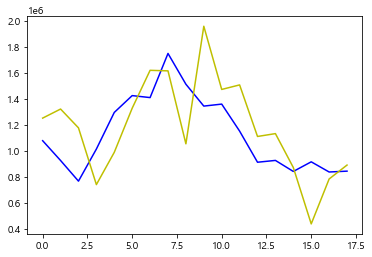

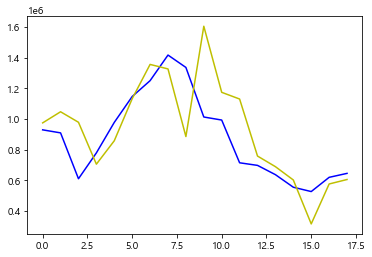

In [237]:
bean = crop_MLP_forecast(column_1 = "콩", column_2 = "콩_0")
model, model1 = bean.modeling()
bean.model_evaluate(model, model1)
bean.plot_volume(model)
bean.plot_price(model1)

# 녹두_수입량_수입가격

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 32)                160       
_________________________________________________________________
dense_138 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
4/4 [==============================] - 0s 754us/step - loss: 390927581184.0000
Epoch 2/1000
4/4 [==============================] - 0s 992us/step - loss: 373624111104.0000
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 367615180800.0000
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 365206634496.0000
Epoch 5/1000

4/4 [==============================] - 0s 1ms/step - loss: 333025607680.0000
Epoch 83/1000
4/4 [==============================] - 0s 748us/step - loss: 330332995584.0000
Epoch 84/1000
4/4 [==============================] - 0s 748us/step - loss: 332248186880.0000
Epoch 85/1000
4/4 [==============================] - 0s 1ms/step - loss: 330550509568.0000
Epoch 86/1000
4/4 [==============================] - 0s 998us/step - loss: 329644015616.0000
Epoch 87/1000
4/4 [==============================] - 0s 1ms/step - loss: 330097917952.0000
Epoch 88/1000
4/4 [==============================] - 0s 748us/step - loss: 330210476032.0000
Epoch 89/1000
4/4 [==============================] - 0s 997us/step - loss: 327910227968.0000
Epoch 90/1000
4/4 [==============================] - 0s 731us/step - loss: 329820405760.0000
Epoch 91/1000
4/4 [==============================] - 0s 1ms/step - loss: 329096364032.0000
Epoch 92/1000
4/4 [==============================] - 0s 1ms/step - loss: 331264786432.0000
E

Epoch 170/1000
4/4 [==============================] - 0s 748us/step - loss: 316590653440.0000
Epoch 171/1000
4/4 [==============================] - 0s 748us/step - loss: 317286416384.0000
Epoch 172/1000
4/4 [==============================] - 0s 748us/step - loss: 317412474880.0000
Epoch 173/1000
4/4 [==============================] - 0s 1ms/step - loss: 315114717184.0000
Epoch 174/1000
4/4 [==============================] - 0s 997us/step - loss: 315856125952.0000
Epoch 175/1000
4/4 [==============================] - 0s 748us/step - loss: 315469856768.0000
Epoch 176/1000
4/4 [==============================] - 0s 1ms/step - loss: 319839928320.0000
Epoch 177/1000
4/4 [==============================] - 0s 995us/step - loss: 315335868416.0000
Epoch 178/1000
4/4 [==============================] - 0s 1ms/step - loss: 313829621760.0000
Epoch 179/1000
4/4 [==============================] - 0s 748us/step - loss: 317795532800.0000
Epoch 180/1000
4/4 [==============================] - 0s 994us/ste

4/4 [==============================] - 0s 747us/step - loss: 289543487488.0000
Epoch 345/1000
4/4 [==============================] - 0s 998us/step - loss: 289046462464.0000
Epoch 346/1000
4/4 [==============================] - 0s 748us/step - loss: 291702996992.0000
Epoch 347/1000
4/4 [==============================] - 0s 1ms/step - loss: 289493188608.0000
Epoch 348/1000
4/4 [==============================] - 0s 995us/step - loss: 286500716544.0000
Epoch 349/1000
4/4 [==============================] - 0s 997us/step - loss: 292717133824.0000
Epoch 350/1000
4/4 [==============================] - 0s 748us/step - loss: 288425115648.0000
Epoch 351/1000
4/4 [==============================] - 0s 749us/step - loss: 288888913920.0000
Epoch 352/1000
4/4 [==============================] - 0s 748us/step - loss: 288761937920.0000
Epoch 353/1000
4/4 [==============================] - 0s 1ms/step - loss: 288830357504.0000
Epoch 354/1000
4/4 [==============================] - 0s 998us/step - loss: 289

4/4 [==============================] - 0s 1ms/step - loss: 279119724544.0000
Epoch 433/1000
4/4 [==============================] - 0s 1ms/step - loss: 279170351104.0000
Epoch 434/1000
4/4 [==============================] - 0s 1ms/step - loss: 273682743296.0000
Epoch 435/1000
4/4 [==============================] - 0s 1ms/step - loss: 275552665600.0000
Epoch 436/1000
4/4 [==============================] - 0s 997us/step - loss: 275186712576.0000
Epoch 437/1000
4/4 [==============================] - 0s 748us/step - loss: 272351608832.0000
Epoch 438/1000
4/4 [==============================] - 0s 1ms/step - loss: 275308150784.0000
Epoch 439/1000
4/4 [==============================] - 0s 997us/step - loss: 274362155008.0000
Epoch 440/1000
4/4 [==============================] - 0s 749us/step - loss: 272875995136.0000
Epoch 441/1000
4/4 [==============================] - 0s 748us/step - loss: 277973630976.0000
Epoch 442/1000
4/4 [==============================] - 0s 997us/step - loss: 273803526

4/4 [==============================] - 0s 997us/step - loss: 242412273664.0000
Epoch 607/1000
4/4 [==============================] - 0s 997us/step - loss: 248247369728.0000
Epoch 608/1000
4/4 [==============================] - 0s 998us/step - loss: 247234838528.0000
Epoch 609/1000
4/4 [==============================] - 0s 998us/step - loss: 246741876736.0000
Epoch 610/1000
4/4 [==============================] - 0s 998us/step - loss: 255793790976.0000
Epoch 611/1000
4/4 [==============================] - 0s 1ms/step - loss: 246402809856.0000
Epoch 612/1000
4/4 [==============================] - 0s 997us/step - loss: 247942742016.0000
Epoch 613/1000
4/4 [==============================] - 0s 990us/step - loss: 248895143936.0000
Epoch 614/1000
4/4 [==============================] - 0s 997us/step - loss: 248669306880.0000
Epoch 615/1000
4/4 [==============================] - 0s 748us/step - loss: 245844099072.0000
Epoch 616/1000
4/4 [==============================] - 0s 1ms/step - loss: 243

4/4 [==============================] - 0s 1ms/step - loss: 230789120000.0000
Epoch 782/1000
4/4 [==============================] - 0s 997us/step - loss: 227514040320.0000
Epoch 783/1000
4/4 [==============================] - 0s 997us/step - loss: 235377442816.0000
Epoch 784/1000
4/4 [==============================] - 0s 1ms/step - loss: 231218790400.0000
Epoch 785/1000
4/4 [==============================] - 0s 998us/step - loss: 232033419264.0000
Epoch 786/1000
4/4 [==============================] - 0s 1ms/step - loss: 235987533824.0000
Epoch 787/1000
4/4 [==============================] - 0s 748us/step - loss: 222815911936.0000
Epoch 788/1000
4/4 [==============================] - 0s 1ms/step - loss: 232226340864.0000
Epoch 789/1000
4/4 [==============================] - 0s 748us/step - loss: 235696979968.0000
Epoch 790/1000
4/4 [==============================] - 0s 997us/step - loss: 229917245440.0000
Epoch 791/1000
4/4 [==============================] - 0s 999us/step - loss: 2352166

4/4 [==============================] - 0s 997us/step - loss: 217146556416.0000
Epoch 956/1000
4/4 [==============================] - 0s 997us/step - loss: 216787861504.0000
Epoch 957/1000
4/4 [==============================] - 0s 997us/step - loss: 214214721536.0000
Epoch 958/1000
4/4 [==============================] - 0s 999us/step - loss: 220332867584.0000
Epoch 959/1000
4/4 [==============================] - 0s 998us/step - loss: 215295033344.0000
Epoch 960/1000
4/4 [==============================] - 0s 997us/step - loss: 221041524736.0000
Epoch 961/1000
4/4 [==============================] - 0s 997us/step - loss: 222651088896.0000
Epoch 962/1000
4/4 [==============================] - 0s 746us/step - loss: 220177793024.0000
Epoch 963/1000
4/4 [==============================] - 0s 997us/step - loss: 224250216448.0000
Epoch 964/1000
4/4 [==============================] - 0s 998us/step - loss: 217983893504.0000
Epoch 965/1000
4/4 [==============================] - 0s 750us/step - loss:

4/4 [==============================] - 0s 1ms/step - loss: 614559907840.0000
Epoch 124/1000
4/4 [==============================] - 0s 2ms/step - loss: 602590281728.0000
Epoch 125/1000
4/4 [==============================] - 0s 1ms/step - loss: 615506771968.0000
Epoch 126/1000
4/4 [==============================] - 0s 1ms/step - loss: 608685522944.0000
Epoch 127/1000
4/4 [==============================] - 0s 1ms/step - loss: 600478842880.0000
Epoch 128/1000
4/4 [==============================] - 0s 995us/step - loss: 605549559808.0000
Epoch 129/1000
4/4 [==============================] - 0s 1ms/step - loss: 597768798208.0000
Epoch 130/1000
4/4 [==============================] - 0s 1ms/step - loss: 599445798912.0000
Epoch 131/1000
4/4 [==============================] - 0s 748us/step - loss: 600193892352.0000
Epoch 132/1000
4/4 [==============================] - 0s 1ms/step - loss: 616295366656.0000
Epoch 133/1000
4/4 [==============================] - 0s 748us/step - loss: 595776634880.00

4/4 [==============================] - 0s 1ms/step - loss: 528079224832.0000
Epoch 300/1000
4/4 [==============================] - 0s 997us/step - loss: 525660848128.0000
Epoch 301/1000
4/4 [==============================] - 0s 998us/step - loss: 526507540480.0000
Epoch 302/1000
4/4 [==============================] - 0s 997us/step - loss: 529985077248.0000
Epoch 303/1000
4/4 [==============================] - 0s 999us/step - loss: 525085605888.0000
Epoch 304/1000
4/4 [==============================] - 0s 748us/step - loss: 526951284736.0000
Epoch 305/1000
4/4 [==============================] - 0s 1ms/step - loss: 525360529408.0000
Epoch 306/1000
4/4 [==============================] - 0s 1ms/step - loss: 522110009344.0000
Epoch 307/1000
4/4 [==============================] - 0s 748us/step - loss: 530550816768.0000
Epoch 308/1000
4/4 [==============================] - 0s 997us/step - loss: 530131910656.0000
Epoch 309/1000
4/4 [==============================] - 0s 746us/step - loss: 52553

4/4 [==============================] - 0s 748us/step - loss: 462236450816.0000
Epoch 476/1000
4/4 [==============================] - 0s 997us/step - loss: 447853953024.0000
Epoch 477/1000
4/4 [==============================] - 0s 1ms/step - loss: 460800688128.0000
Epoch 478/1000
4/4 [==============================] - 0s 748us/step - loss: 455466811392.0000
Epoch 479/1000
4/4 [==============================] - 0s 1ms/step - loss: 454800637952.0000
Epoch 480/1000
4/4 [==============================] - 0s 999us/step - loss: 457185656832.0000
Epoch 481/1000
4/4 [==============================] - 0s 997us/step - loss: 454081839104.0000
Epoch 482/1000
4/4 [==============================] - 0s 1ms/step - loss: 446343282688.0000
Epoch 483/1000
4/4 [==============================] - 0s 1ms/step - loss: 445872177152.0000
Epoch 484/1000
4/4 [==============================] - 0s 1ms/step - loss: 452287627264.0000
Epoch 485/1000
4/4 [==============================] - 0s 997us/step - loss: 447586500

4/4 [==============================] - 0s 997us/step - loss: 396664242176.0000
Epoch 650/1000
4/4 [==============================] - 0s 998us/step - loss: 411646001152.0000
Epoch 651/1000
4/4 [==============================] - 0s 998us/step - loss: 420299767808.0000
Epoch 652/1000
4/4 [==============================] - 0s 998us/step - loss: 397507231744.0000
Epoch 653/1000
4/4 [==============================] - 0s 1ms/step - loss: 419315482624.0000
Epoch 654/1000
4/4 [==============================] - 0s 997us/step - loss: 400773709824.0000
Epoch 655/1000
4/4 [==============================] - 0s 999us/step - loss: 409947766784.0000
Epoch 656/1000
4/4 [==============================] - 0s 998us/step - loss: 391733477376.0000
Epoch 657/1000
4/4 [==============================] - 0s 748us/step - loss: 414513496064.0000
Epoch 658/1000
4/4 [==============================] - 0s 998us/step - loss: 396955025408.0000
Epoch 659/1000
4/4 [==============================] - 0s 748us/step - loss: 4

4/4 [==============================] - 0s 748us/step - loss: 365399146496.0000
Epoch 824/1000
4/4 [==============================] - 0s 749us/step - loss: 365760708608.0000
Epoch 825/1000
4/4 [==============================] - 0s 1ms/step - loss: 376368988160.0000
Epoch 826/1000
4/4 [==============================] - 0s 998us/step - loss: 373471444992.0000
Epoch 827/1000
4/4 [==============================] - 0s 1ms/step - loss: 372001112064.0000
Epoch 828/1000
4/4 [==============================] - 0s 997us/step - loss: 364800868352.0000
Epoch 829/1000
4/4 [==============================] - 0s 998us/step - loss: 369462083584.0000
Epoch 830/1000
4/4 [==============================] - 0s 1ms/step - loss: 374167306240.0000
Epoch 831/1000
4/4 [==============================] - 0s 748us/step - loss: 365908164608.0000
Epoch 832/1000
4/4 [==============================] - 0s 997us/step - loss: 370669322240.0000
Epoch 833/1000
4/4 [==============================] - 0s 748us/step - loss: 36787

4/4 [==============================] - 0s 748us/step - loss: 383111364608.0000
Epoch 998/1000
4/4 [==============================] - 0s 1ms/step - loss: 344626462720.0000
Epoch 999/1000
4/4 [==============================] - 0s 1ms/step - loss: 360989163520.0000
Epoch 1000/1000
1/1 [==============================] - 0s 0s/step - loss: 607289147392.0000
녹두 수입량 train_score : 211917979648.0
녹두 수입량 test_score : 991686819840.0
녹두 수입가격 train_score : 539408564224.0
녹두 수입가격 test_score : 607289147392.0


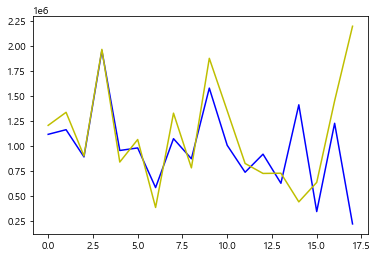

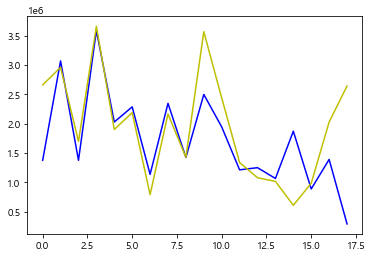

In [238]:
green_bean = crop_MLP_forecast(column_1 = "녹두", column_2 = "녹두_0")
model, model1 = green_bean.modeling()
green_bean.model_evaluate(model, model1)
green_bean.plot_volume(model)
green_bean.plot_price(model1)

# 메밀_수입량_수입가격

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 32)                160       
_________________________________________________________________
dense_144 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_145 (Dense)            (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
4/4 [==============================] - 0s 997us/step - loss: 97288503296.0000
Epoch 2/1000
4/4 [==============================] - 0s 997us/step - loss: 96306348032.0000
Epoch 3/1000
4/4 [==============================] - 0s 749us/step - loss: 95288827904.0000
Epoch 4/1000
4/4 [==============================] - 0s 748us/step - loss: 94878269440.0000
Epoch 5/1000

4/4 [==============================] - 0s 1ms/step - loss: 88643698688.0000
Epoch 81/1000
4/4 [==============================] - 0s 998us/step - loss: 88334426112.0000
Epoch 82/1000
4/4 [==============================] - 0s 748us/step - loss: 90019053568.0000
Epoch 83/1000
4/4 [==============================] - 0s 999us/step - loss: 88453595136.0000
Epoch 84/1000
4/4 [==============================] - 0s 998us/step - loss: 87894220800.0000
Epoch 85/1000
4/4 [==============================] - 0s 997us/step - loss: 87663886336.0000
Epoch 86/1000
4/4 [==============================] - 0s 749us/step - loss: 87403560960.0000
Epoch 87/1000
4/4 [==============================] - 0s 748us/step - loss: 87468662784.0000
Epoch 88/1000
4/4 [==============================] - 0s 748us/step - loss: 87297802240.0000
Epoch 89/1000
4/4 [==============================] - 0s 998us/step - loss: 87289036800.0000
Epoch 90/1000
4/4 [==============================] - 0s 999us/step - loss: 87087554560.0000
Epoc

4/4 [==============================] - 0s 748us/step - loss: 81705132032.0000
Epoch 257/1000
4/4 [==============================] - 0s 997us/step - loss: 81009762304.0000
Epoch 258/1000
4/4 [==============================] - 0s 998us/step - loss: 81495547904.0000
Epoch 259/1000
4/4 [==============================] - 0s 748us/step - loss: 81262755840.0000
Epoch 260/1000
4/4 [==============================] - 0s 997us/step - loss: 81405796352.0000
Epoch 261/1000
4/4 [==============================] - 0s 998us/step - loss: 81408868352.0000
Epoch 262/1000
4/4 [==============================] - 0s 996us/step - loss: 81503797248.0000
Epoch 263/1000
4/4 [==============================] - 0s 749us/step - loss: 81005830144.0000
Epoch 264/1000
4/4 [==============================] - 0s 997us/step - loss: 81156456448.0000
Epoch 265/1000
4/4 [==============================] - 0s 997us/step - loss: 81058570240.0000
Epoch 266/1000
4/4 [==============================] - 0s 749us/step - loss: 807993180

4/4 [==============================] - 0s 997us/step - loss: 78909669376.0000
Epoch 433/1000
4/4 [==============================] - 0s 998us/step - loss: 78882955264.0000
Epoch 434/1000
4/4 [==============================] - 0s 748us/step - loss: 79514886144.0000
Epoch 435/1000
4/4 [==============================] - 0s 997us/step - loss: 79715909632.0000
Epoch 436/1000
4/4 [==============================] - 0s 998us/step - loss: 78408302592.0000
Epoch 437/1000
4/4 [==============================] - 0s 997us/step - loss: 80632750080.0000
Epoch 438/1000
4/4 [==============================] - 0s 748us/step - loss: 79158755328.0000
Epoch 439/1000
4/4 [==============================] - 0s 748us/step - loss: 79299510272.0000
Epoch 440/1000
4/4 [==============================] - 0s 996us/step - loss: 79790284800.0000
Epoch 441/1000
4/4 [==============================] - 0s 1ms/step - loss: 78682259456.0000
Epoch 442/1000
4/4 [==============================] - 0s 749us/step - loss: 79900221440

4/4 [==============================] - 0s 1ms/step - loss: 78093484032.0000
Epoch 609/1000
4/4 [==============================] - 0s 997us/step - loss: 77511237632.0000
Epoch 610/1000
4/4 [==============================] - 0s 1ms/step - loss: 77554810880.0000
Epoch 611/1000
4/4 [==============================] - 0s 998us/step - loss: 77504192512.0000
Epoch 612/1000
4/4 [==============================] - 0s 1ms/step - loss: 77771235328.0000
Epoch 613/1000
4/4 [==============================] - 0s 997us/step - loss: 77451870208.0000
Epoch 614/1000
4/4 [==============================] - 0s 1ms/step - loss: 77233430528.0000
Epoch 615/1000
4/4 [==============================] - 0s 1ms/step - loss: 77232578560.0000
Epoch 616/1000
4/4 [==============================] - 0s 1ms/step - loss: 77388300288.0000
Epoch 617/1000
4/4 [==============================] - 0s 997us/step - loss: 77480804352.0000
Epoch 618/1000
4/4 [==============================] - 0s 1ms/step - loss: 77639557120.0000
Epoch 

4/4 [==============================] - 0s 748us/step - loss: 78105460736.0000
Epoch 785/1000
4/4 [==============================] - 0s 748us/step - loss: 76764037120.0000
Epoch 786/1000
4/4 [==============================] - 0s 748us/step - loss: 77208412160.0000
Epoch 787/1000
4/4 [==============================] - 0s 997us/step - loss: 76289253376.0000
Epoch 788/1000
4/4 [==============================] - 0s 748us/step - loss: 76974981120.0000
Epoch 789/1000
4/4 [==============================] - 0s 748us/step - loss: 76802113536.0000
Epoch 790/1000
4/4 [==============================] - 0s 997us/step - loss: 76772810752.0000
Epoch 791/1000
4/4 [==============================] - 0s 997us/step - loss: 76148695040.0000
Epoch 792/1000
4/4 [==============================] - 0s 748us/step - loss: 76682076160.0000
Epoch 793/1000
4/4 [==============================] - 0s 748us/step - loss: 76011347968.0000
Epoch 794/1000
4/4 [==============================] - 0s 748us/step - loss: 768531415

4/4 [==============================] - 0s 748us/step - loss: 75868553216.0000
Epoch 961/1000
4/4 [==============================] - 0s 997us/step - loss: 76176891904.0000
Epoch 962/1000
4/4 [==============================] - 0s 748us/step - loss: 75796504576.0000
Epoch 963/1000
4/4 [==============================] - 0s 748us/step - loss: 76213788672.0000
Epoch 964/1000
4/4 [==============================] - 0s 1ms/step - loss: 75912945664.0000
Epoch 965/1000
4/4 [==============================] - 0s 997us/step - loss: 75935752192.0000
Epoch 966/1000
4/4 [==============================] - 0s 748us/step - loss: 76041936896.0000
Epoch 967/1000
4/4 [==============================] - 0s 1ms/step - loss: 76113895424.0000
Epoch 968/1000
4/4 [==============================] - 0s 748us/step - loss: 76519735296.0000
Epoch 969/1000
4/4 [==============================] - 0s 748us/step - loss: 76394995712.0000
Epoch 970/1000
4/4 [==============================] - 0s 997us/step - loss: 76738183168.0

4/4 [==============================] - 0s 997us/step - loss: 56199274496.0000
Epoch 130/1000
4/4 [==============================] - 0s 1ms/step - loss: 56169840640.0000
Epoch 131/1000
4/4 [==============================] - 0s 749us/step - loss: 55764103168.0000
Epoch 132/1000
4/4 [==============================] - 0s 1ms/step - loss: 55531098112.0000
Epoch 133/1000
4/4 [==============================] - 0s 998us/step - loss: 55492780032.0000
Epoch 134/1000
4/4 [==============================] - 0s 1ms/step - loss: 55719223296.0000
Epoch 135/1000
4/4 [==============================] - 0s 998us/step - loss: 55433306112.0000
Epoch 136/1000
4/4 [==============================] - 0s 1ms/step - loss: 55319879680.0000
Epoch 137/1000
4/4 [==============================] - 0s 997us/step - loss: 54981644288.0000
Epoch 138/1000
4/4 [==============================] - 0s 748us/step - loss: 55326998528.0000
Epoch 139/1000
4/4 [==============================] - 0s 997us/step - loss: 55308414976.0000


4/4 [==============================] - 0s 2ms/step - loss: 48409493504.0000
Epoch 307/1000
4/4 [==============================] - 0s 2ms/step - loss: 48258035712.0000
Epoch 308/1000
4/4 [==============================] - 0s 1ms/step - loss: 48358748160.0000
Epoch 309/1000
4/4 [==============================] - 0s 2ms/step - loss: 48173465600.0000
Epoch 310/1000
4/4 [==============================] - 0s 1ms/step - loss: 47289069568.0000
Epoch 311/1000
4/4 [==============================] - 0s 1ms/step - loss: 47701970944.0000
Epoch 312/1000
4/4 [==============================] - 0s 2ms/step - loss: 48396750848.0000
Epoch 313/1000
4/4 [==============================] - 0s 1ms/step - loss: 47731515392.0000
Epoch 314/1000
4/4 [==============================] - 0s 2ms/step - loss: 47563128832.0000
Epoch 315/1000
4/4 [==============================] - 0s 1ms/step - loss: 47237947392.0000
Epoch 316/1000
4/4 [==============================] - 0s 2ms/step - loss: 47639965696.0000
Epoch 317/1000

4/4 [==============================] - 0s 1ms/step - loss: 43731263488.0000
Epoch 485/1000
4/4 [==============================] - 0s 1ms/step - loss: 43657396224.0000
Epoch 486/1000
4/4 [==============================] - 0s 1ms/step - loss: 43892502528.0000
Epoch 487/1000
4/4 [==============================] - 0s 998us/step - loss: 43578212352.0000
Epoch 488/1000
4/4 [==============================] - 0s 1ms/step - loss: 43486789632.0000
Epoch 489/1000
4/4 [==============================] - 0s 1ms/step - loss: 43523051520.0000
Epoch 490/1000
4/4 [==============================] - 0s 1ms/step - loss: 43876466688.0000
Epoch 491/1000
4/4 [==============================] - 0s 1ms/step - loss: 43578097664.0000
Epoch 492/1000
4/4 [==============================] - 0s 1ms/step - loss: 43723370496.0000
Epoch 493/1000
4/4 [==============================] - 0s 2ms/step - loss: 44290756608.0000
Epoch 494/1000
4/4 [==============================] - 0s 998us/step - loss: 43244888064.0000
Epoch 495/

4/4 [==============================] - 0s 1ms/step - loss: 43719757824.0000
Epoch 574/1000
4/4 [==============================] - 0s 748us/step - loss: 43071762432.0000
Epoch 575/1000
4/4 [==============================] - 0s 1ms/step - loss: 43283292160.0000
Epoch 576/1000
4/4 [==============================] - 0s 999us/step - loss: 43465797632.0000
Epoch 577/1000
4/4 [==============================] - 0s 748us/step - loss: 43057352704.0000
Epoch 578/1000
4/4 [==============================] - 0s 1ms/step - loss: 43049836544.0000
Epoch 579/1000
4/4 [==============================] - 0s 998us/step - loss: 42740027392.0000
Epoch 580/1000
4/4 [==============================] - 0s 1ms/step - loss: 43033452544.0000
Epoch 581/1000
4/4 [==============================] - 0s 1ms/step - loss: 42670391296.0000
Epoch 582/1000
4/4 [==============================] - 0s 2ms/step - loss: 43143704576.0000
Epoch 583/1000
4/4 [==============================] - 0s 997us/step - loss: 42899533824.0000
Epoc

4/4 [==============================] - 0s 1ms/step - loss: 42757074944.0000
Epoch 663/1000
4/4 [==============================] - 0s 997us/step - loss: 42281783296.0000
Epoch 664/1000
4/4 [==============================] - 0s 748us/step - loss: 42219831296.0000
Epoch 665/1000
4/4 [==============================] - 0s 997us/step - loss: 41730138112.0000
Epoch 666/1000
4/4 [==============================] - 0s 999us/step - loss: 42388258816.0000
Epoch 667/1000
4/4 [==============================] - 0s 1ms/step - loss: 42243588096.0000
Epoch 668/1000
4/4 [==============================] - 0s 997us/step - loss: 42558771200.0000
Epoch 669/1000
4/4 [==============================] - 0s 997us/step - loss: 42052923392.0000
Epoch 670/1000
4/4 [==============================] - 0s 998us/step - loss: 41847513088.0000
Epoch 671/1000
4/4 [==============================] - 0s 998us/step - loss: 41397047296.0000
Epoch 672/1000
4/4 [==============================] - 0s 997us/step - loss: 42260160512.0

4/4 [==============================] - 0s 1ms/step - loss: 40661909504.0000
Epoch 839/1000
4/4 [==============================] - 0s 1ms/step - loss: 40937861120.0000
Epoch 840/1000
4/4 [==============================] - 0s 997us/step - loss: 40365985792.0000
Epoch 841/1000
4/4 [==============================] - 0s 997us/step - loss: 40571060224.0000
Epoch 842/1000
4/4 [==============================] - 0s 997us/step - loss: 40502632448.0000
Epoch 843/1000
4/4 [==============================] - 0s 748us/step - loss: 40796893184.0000
Epoch 844/1000
4/4 [==============================] - 0s 1ms/step - loss: 40484552704.0000
Epoch 845/1000
4/4 [==============================] - 0s 1ms/step - loss: 40575897600.0000
Epoch 846/1000
4/4 [==============================] - 0s 748us/step - loss: 40452038656.0000
Epoch 847/1000
4/4 [==============================] - 0s 748us/step - loss: 40098709504.0000
Epoch 848/1000
4/4 [==============================] - 0s 748us/step - loss: 40843513856.0000


1/1 [==============================] - 0s 0s/step - loss: 40551432192.0000
메밀 수입량 train_score : 75404001280.0
메밀 수입량 test_score : 35052212224.0
메밀 수입가격 train_score : 47685812224.0
메밀 수입가격 test_score : 40551432192.0


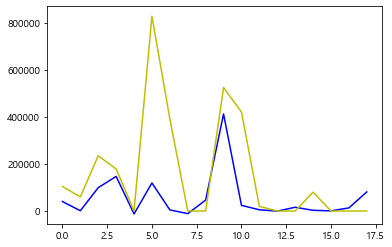

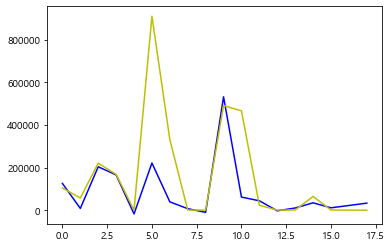

In [239]:
buck_wheat = crop_MLP_forecast(column_1 = "메밀", column_2 = "메밀_0")
model, model1 = buck_wheat.modeling()
buck_wheat.model_evaluate(model, model1)
buck_wheat.plot_volume(model)
buck_wheat.plot_price(model1)

# 기타콩_수입량_수입가격

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 32)                160       
_________________________________________________________________
dense_150 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
4/4 [==============================] - 0s 735us/step - loss: 82641264640.0000
Epoch 2/1000
4/4 [==============================] - 0s 749us/step - loss: 57147146240.0000
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 41824325632.0000
Epoch 4/1000
4/4 [==============================] - 0s 748us/step - loss: 29587888128.0000
Epoch 5/1000
4

4/4 [==============================] - 0s 2ms/step - loss: 8346545664.0000
Epoch 175/1000
4/4 [==============================] - 0s 997us/step - loss: 8386536960.0000
Epoch 176/1000
4/4 [==============================] - 0s 2ms/step - loss: 8442554880.0000
Epoch 177/1000
4/4 [==============================] - 0s 1ms/step - loss: 8396259328.0000
Epoch 178/1000
4/4 [==============================] - 0s 2ms/step - loss: 8355321344.0000
Epoch 179/1000
4/4 [==============================] - 0s 997us/step - loss: 8355503616.0000
Epoch 180/1000
4/4 [==============================] - 0s 1ms/step - loss: 8345761280.0000
Epoch 181/1000
4/4 [==============================] - 0s 750us/step - loss: 8337989632.0000
Epoch 182/1000
4/4 [==============================] - 0s 2ms/step - loss: 8365070848.0000
Epoch 183/1000
4/4 [==============================] - 0s 998us/step - loss: 8364142080.0000
Epoch 184/1000
4/4 [==============================] - 0s 2ms/step - loss: 8368116736.0000
Epoch 185/1000
4/

4/4 [==============================] - 0s 997us/step - loss: 8291593728.0000
Epoch 355/1000
4/4 [==============================] - 0s 2ms/step - loss: 8327127040.0000
Epoch 356/1000
4/4 [==============================] - 0s 997us/step - loss: 8319785984.0000
Epoch 357/1000
4/4 [==============================] - 0s 1ms/step - loss: 8266318336.0000
Epoch 358/1000
4/4 [==============================] - 0s 996us/step - loss: 8278235136.0000
Epoch 359/1000
4/4 [==============================] - 0s 1ms/step - loss: 8313775104.0000
Epoch 360/1000
4/4 [==============================] - 0s 997us/step - loss: 8315015680.0000
Epoch 361/1000
4/4 [==============================] - 0s 1ms/step - loss: 8286795776.0000
Epoch 362/1000
4/4 [==============================] - 0s 997us/step - loss: 8309299712.0000
Epoch 363/1000
4/4 [==============================] - 0s 1ms/step - loss: 8306276864.0000
Epoch 364/1000
4/4 [==============================] - 0s 1ms/step - loss: 8282040832.0000
Epoch 365/1000


4/4 [==============================] - 0s 998us/step - loss: 8229452800.0000
Epoch 535/1000
4/4 [==============================] - 0s 1ms/step - loss: 8201104384.0000
Epoch 536/1000
4/4 [==============================] - 0s 998us/step - loss: 8259309568.0000
Epoch 537/1000
4/4 [==============================] - 0s 1ms/step - loss: 8196194304.0000
Epoch 538/1000
4/4 [==============================] - 0s 997us/step - loss: 8221549568.0000
Epoch 539/1000
4/4 [==============================] - 0s 1ms/step - loss: 8192236032.0000
Epoch 540/1000
4/4 [==============================] - 0s 997us/step - loss: 8260874240.0000
Epoch 541/1000
4/4 [==============================] - 0s 1ms/step - loss: 8277193728.0000
Epoch 542/1000
4/4 [==============================] - 0s 997us/step - loss: 8340912640.0000
Epoch 543/1000
4/4 [==============================] - 0s 1ms/step - loss: 8207118336.0000
Epoch 544/1000
4/4 [==============================] - 0s 1ms/step - loss: 8245517312.0000
Epoch 545/1000


4/4 [==============================] - 0s 997us/step - loss: 8138674688.0000
Epoch 715/1000
4/4 [==============================] - 0s 1ms/step - loss: 8275961344.0000
Epoch 716/1000
4/4 [==============================] - 0s 998us/step - loss: 8151698432.0000
Epoch 717/1000
4/4 [==============================] - 0s 1ms/step - loss: 8150419968.0000
Epoch 718/1000
4/4 [==============================] - 0s 1ms/step - loss: 8125846016.0000
Epoch 719/1000
4/4 [==============================] - 0s 998us/step - loss: 8211508736.0000
Epoch 720/1000
4/4 [==============================] - 0s 997us/step - loss: 8154859008.0000
Epoch 721/1000
4/4 [==============================] - 0s 997us/step - loss: 8233484288.0000
Epoch 722/1000
4/4 [==============================] - 0s 997us/step - loss: 8118041600.0000
Epoch 723/1000
4/4 [==============================] - 0s 997us/step - loss: 8244318720.0000
Epoch 724/1000
4/4 [==============================] - 0s 1ms/step - loss: 8134803456.0000
Epoch 725/1

4/4 [==============================] - 0s 998us/step - loss: 8099227136.0000
Epoch 895/1000
4/4 [==============================] - 0s 1ms/step - loss: 8052667392.0000
Epoch 896/1000
4/4 [==============================] - 0s 997us/step - loss: 8169562112.0000
Epoch 897/1000
4/4 [==============================] - 0s 748us/step - loss: 8127551488.0000
Epoch 898/1000
4/4 [==============================] - 0s 1ms/step - loss: 8098587648.0000
Epoch 899/1000
4/4 [==============================] - 0s 1ms/step - loss: 8065512448.0000
Epoch 900/1000
4/4 [==============================] - 0s 1ms/step - loss: 8133222400.0000
Epoch 901/1000
4/4 [==============================] - 0s 1ms/step - loss: 8126418944.0000
Epoch 902/1000
4/4 [==============================] - 0s 1ms/step - loss: 8088598016.0000
Epoch 903/1000
4/4 [==============================] - 0s 1ms/step - loss: 8144181760.0000
Epoch 904/1000
4/4 [==============================] - 0s 1ms/step - loss: 8075678720.0000
Epoch 905/1000
4/4 

4/4 [==============================] - 0s 1000us/step - loss: 7396382720.0000
Epoch 67/1000
4/4 [==============================] - 0s 1ms/step - loss: 7315845120.0000
Epoch 68/1000
4/4 [==============================] - 0s 997us/step - loss: 7375676928.0000
Epoch 69/1000
4/4 [==============================] - 0s 1ms/step - loss: 7243771392.0000
Epoch 70/1000
4/4 [==============================] - 0s 1ms/step - loss: 7282244608.0000
Epoch 71/1000
4/4 [==============================] - 0s 2ms/step - loss: 7255112192.0000
Epoch 72/1000
4/4 [==============================] - 0s 1ms/step - loss: 7200438784.0000
Epoch 73/1000
4/4 [==============================] - 0s 1ms/step - loss: 7260083712.0000
Epoch 74/1000
4/4 [==============================] - 0s 2ms/step - loss: 7235720192.0000
Epoch 75/1000
4/4 [==============================] - 0s 1ms/step - loss: 7277086208.0000
Epoch 76/1000
4/4 [==============================] - 0s 1ms/step - loss: 7312711680.0000
Epoch 77/1000
4/4 [===========

Epoch 248/1000
4/4 [==============================] - 0s 1ms/step - loss: 6824746496.0000
Epoch 249/1000
4/4 [==============================] - 0s 2ms/step - loss: 6738863616.0000
Epoch 250/1000
4/4 [==============================] - 0s 998us/step - loss: 6828417536.0000
Epoch 251/1000
4/4 [==============================] - 0s 2ms/step - loss: 6761140736.0000
Epoch 252/1000
4/4 [==============================] - 0s 1ms/step - loss: 6838475776.0000
Epoch 253/1000
4/4 [==============================] - 0s 1ms/step - loss: 6835471872.0000
Epoch 254/1000
4/4 [==============================] - 0s 997us/step - loss: 6884144640.0000
Epoch 255/1000
4/4 [==============================] - 0s 1ms/step - loss: 6879413248.0000
Epoch 256/1000
4/4 [==============================] - 0s 1ms/step - loss: 6704668672.0000
Epoch 257/1000
4/4 [==============================] - 0s 1ms/step - loss: 6798857216.0000
Epoch 258/1000
4/4 [==============================] - 0s 2ms/step - loss: 6735782912.0000
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 6595337728.0000
Epoch 429/1000
4/4 [==============================] - 0s 994us/step - loss: 6633668096.0000
Epoch 430/1000
4/4 [==============================] - 0s 1ms/step - loss: 6547623936.0000
Epoch 431/1000
4/4 [==============================] - 0s 997us/step - loss: 6671089664.0000
Epoch 432/1000
4/4 [==============================] - 0s 1ms/step - loss: 6595257344.0000
Epoch 433/1000
4/4 [==============================] - 0s 997us/step - loss: 6584535040.0000
Epoch 434/1000
4/4 [==============================] - 0s 1ms/step - loss: 6533146624.0000
Epoch 435/1000
4/4 [==============================] - 0s 998us/step - loss: 6505424896.0000
Epoch 436/1000
4/4 [==============================] - 0s 1ms/step - loss: 6514686464.0000
Epoch 437/1000
4/4 [==============================] - 0s 997us/step - loss: 6557714432.0000
Epoch 438/1000
4/4 [==============================] - 0s 1ms/step - loss: 6510658048.0000
Epoch 439/1000


4/4 [==============================] - 0s 1ms/step - loss: 6288971776.0000
Epoch 609/1000
4/4 [==============================] - 0s 748us/step - loss: 6401971200.0000
Epoch 610/1000
4/4 [==============================] - 0s 1ms/step - loss: 6291361280.0000
Epoch 611/1000
4/4 [==============================] - 0s 1ms/step - loss: 6408751616.0000
Epoch 612/1000
4/4 [==============================] - 0s 1ms/step - loss: 6422777856.0000
Epoch 613/1000
4/4 [==============================] - 0s 997us/step - loss: 6317110784.0000
Epoch 614/1000
4/4 [==============================] - 0s 1ms/step - loss: 6346265600.0000
Epoch 615/1000
4/4 [==============================] - 0s 1ms/step - loss: 6344846848.0000
Epoch 616/1000
4/4 [==============================] - 0s 1ms/step - loss: 6372805632.0000
Epoch 617/1000
4/4 [==============================] - 0s 1ms/step - loss: 6363854848.0000
Epoch 618/1000
4/4 [==============================] - 0s 1ms/step - loss: 6395168256.0000
Epoch 619/1000
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 6163599872.0000
Epoch 789/1000
4/4 [==============================] - 0s 1ms/step - loss: 6072609280.0000
Epoch 790/1000
4/4 [==============================] - 0s 998us/step - loss: 6158634496.0000
Epoch 791/1000
4/4 [==============================] - 0s 1ms/step - loss: 6041192960.0000
Epoch 792/1000
4/4 [==============================] - 0s 748us/step - loss: 6083957760.0000
Epoch 793/1000
4/4 [==============================] - 0s 997us/step - loss: 6209155072.0000
Epoch 794/1000
4/4 [==============================] - 0s 995us/step - loss: 6100020224.0000
Epoch 795/1000
4/4 [==============================] - 0s 998us/step - loss: 6201781760.0000
Epoch 796/1000
4/4 [==============================] - 0s 998us/step - loss: 6371382784.0000
Epoch 797/1000
4/4 [==============================] - 0s 1ms/step - loss: 5979910144.0000
Epoch 798/1000
4/4 [==============================] - 0s 1ms/step - loss: 6444405760.0000
Epoch 799/1

4/4 [==============================] - 0s 997us/step - loss: 5340836352.0000
Epoch 969/1000
4/4 [==============================] - 0s 2ms/step - loss: 5318987776.0000
Epoch 970/1000
4/4 [==============================] - 0s 1ms/step - loss: 5279962112.0000
Epoch 971/1000
4/4 [==============================] - 0s 2ms/step - loss: 5380189696.0000
Epoch 972/1000
4/4 [==============================] - 0s 748us/step - loss: 5200723456.0000
Epoch 973/1000
4/4 [==============================] - 0s 1ms/step - loss: 5406545408.0000
Epoch 974/1000
4/4 [==============================] - 0s 1ms/step - loss: 5577824256.0000
Epoch 975/1000
4/4 [==============================] - 0s 1ms/step - loss: 5219762176.0000
Epoch 976/1000
4/4 [==============================] - 0s 748us/step - loss: 5346991104.0000
Epoch 977/1000
4/4 [==============================] - 0s 997us/step - loss: 5448787456.0000
Epoch 978/1000
4/4 [==============================] - 0s 1ms/step - loss: 5333094400.0000
Epoch 979/1000
4/

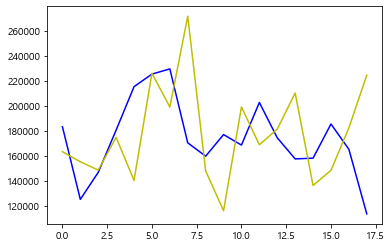

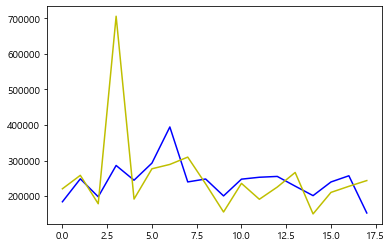

In [240]:
etc_bean = crop_MLP_forecast(column_1 = "기타콩", column_2 = "기타콩_0")
model, model1 = etc_bean.modeling()
etc_bean.model_evaluate(model, model1)
etc_bean.plot_volume(model)
etc_bean.plot_price(model1)